In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

In [87]:
#credit risk model development 
""" 1. EDA and Feature Engineering.
    2. ML pipeline development
    3. Credit Risk Model Predictiom Probability of defualt-PD modeling and LGD modeling"""

' 1. EDA and Feature Engineering.\n    2. ML pipeline development\n    3. Credit Risk Model Predictiom Probability of defualt-PD modeling and LGD modeling'

In [88]:
# upload the dataset 
df=pd.read_csv(r'C:\Users\DELL\Desktop\VIKAS SINGH\100 Days machine learning   -\ML_PIPELINE\home_loan_credit_risk_dataset_eda_pipeline and model.csv')

In [89]:
df.head()

customer_id application_date  loan_amount  interest_rate  tenure_years  \
0            1       2015-01-01      7423388           6.63            25   
1            2       2015-01-02      7550634           8.11            10   
2            3       2015-01-03      5304572           9.75            25   
3            4       2015-01-04      3234489          10.30            30   
4            5       2015-01-05      8204212           8.05            20   

   credit_score employment_type  property_value      EMI  default_flag  \
0           818   Self-employed     11588679.90 50728.00             0   
1           311   Self-employed      9789522.56 92049.00             0   
2           827   Self-employed      7343342.48 47271.00             0   
3           854   Self-employed      4051039.41 29105.00             0   
4           672   Self-employed      9489344.59 68879.00             0   

   years_before_default  outstanding_principal  recovery_value  LGD  EAD   PD  \
0                   NaN                   0.00            0.00 0.00 0.00 0.02   
1                   NaN                   0.00            0.00 0.00 0.00 0.30   
2                   NaN                   0.00            0.00 0.00 0.00 0.02   
3                   NaN                   0.00            0.00 0.00 0.00 0.02   
4                   NaN                   0.00            0.00 0.00 0.00 0.10   

    EL  
0 0.00  
1 0.00  
2 0.00  
3 0.00  
4 0.00

In [90]:
# column description
"""🧮 Key Variables in This Dataset:
loan_amount: Principal borrowed (₹10L–₹1Cr)
interest_rate: Annual interest rate (6.5%–12.5%)
tenure_years: Loan term (10–30 years)
credit_score: CIBIL-like score (300–900)
default_flag: Indicates if the customer defaulted
PD (Probability of Default): Based on credit score
LGD (Loss Given Default): Calculated using recovery values from property
EAD (Exposure at Default): Outstanding principal at default
EL (Expected Loss): = PD × LGD × EAD """

'🧮 Key Variables in This Dataset:\nloan_amount: Principal borrowed (₹10L–₹1Cr)\ninterest_rate: Annual interest rate (6.5%–12.5%)\ntenure_years: Loan term (10–30 years)\ncredit_score: CIBIL-like score (300–900)\ndefault_flag: Indicates if the customer defaulted\nPD (Probability of Default): Based on credit score\nLGD (Loss Given Default): Calculated using recovery values from property\nEAD (Exposure at Default): Outstanding principal at default\nEL (Expected Loss): = PD × LGD × EAD '

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            1000 non-null   int64  
 1   application_date       1000 non-null   object 
 2   loan_amount            1000 non-null   int64  
 3   interest_rate          1000 non-null   float64
 4   tenure_years           1000 non-null   int64  
 5   credit_score           1000 non-null   int64  
 6   employment_type        1000 non-null   object 
 7   property_value         1000 non-null   float64
 8   EMI                    1000 non-null   float64
 9   default_flag           1000 non-null   int64  
 10  years_before_default   128 non-null    float64
 11  outstanding_principal  1000 non-null   float64
 12  recovery_value         1000 non-null   float64
 13  LGD                    1000 non-null   float64
 14  EAD                    1000 non-null   float64
 15  PD   

In [92]:
df.isnull().sum()

customer_id                0
application_date           0
loan_amount                0
interest_rate              0
tenure_years               0
credit_score               0
employment_type            0
property_value             0
EMI                        0
default_flag               0
years_before_default     872
outstanding_principal      0
recovery_value             0
LGD                        0
EAD                        0
PD                         0
EL                         0
dtype: int64

In [93]:

df.drop(columns='customer_id').describe()


loan_amount  interest_rate  tenure_years  credit_score  property_value  \
count      1000.00        1000.00       1000.00       1000.00         1000.00   
mean    5468411.47           9.53         20.16        606.25      7390036.59   
std     2533625.79           1.76          7.11        173.89      3533530.83   
min     1039353.00           6.52         10.00        300.00      1209009.56   
25%     3303918.50           7.94         15.00        454.75      4435144.43   
50%     5422540.50           9.61         20.00        612.50      7421453.57   
75%     7556018.00          11.05         25.00        756.00     10121493.31   
max     9997354.00          12.50         30.00        899.00     16237644.80   

            EMI  default_flag  years_before_default  outstanding_principal  \
count   1000.00       1000.00                128.00                1000.00   
mean   54687.32          0.13                  3.03              599076.66   
std    28403.50          0.33                  1.36             1751299.26   
min     6906.00          0.00                  1.00                   0.00   
25%    31482.00          0.00                  2.00                   0.00   
50%    52870.00          0.00                  3.00                   0.00   
75%    74213.00          0.00                  4.00                   0.00   
max   137373.00          1.00                  5.00             9394476.85   

       recovery_value     LGD        EAD      PD        EL  
count         1000.00 1000.00    1000.00 1000.00   1000.00  
mean        822019.83    0.00  599076.66    0.17    132.29  
std        2387437.16    0.00 1751299.26    0.13   3347.40  
min              0.00    0.00       0.00    0.02      0.00  
25%              0.00    0.00       0.00    0.02      0.00  
50%              0.00    0.00       0.00    0.10      0.00  
75%              0.00    0.00       0.00    0.30      0.00  
max       14470638.96    0.07 9394476.85    0.30 103071.68

1. total no of account is 1000
2. average loan ticket size is 54.68 lakh.
3. 75 % loan disbursed up to value of ~76 lakh
4. 75 % loan interest under the 11.05 , 50 % is under 9.61 % and 25 % is under 7.94%
5. 25 % customers are under the 454.75-- High risk bucket, 50 % customers have credit score is under 612.50 moderate, 75% under the 756 low risk  ---- here on the basis of that we cam create a risk column into buckets.
6. average property value is ~74 lakh.
7. 

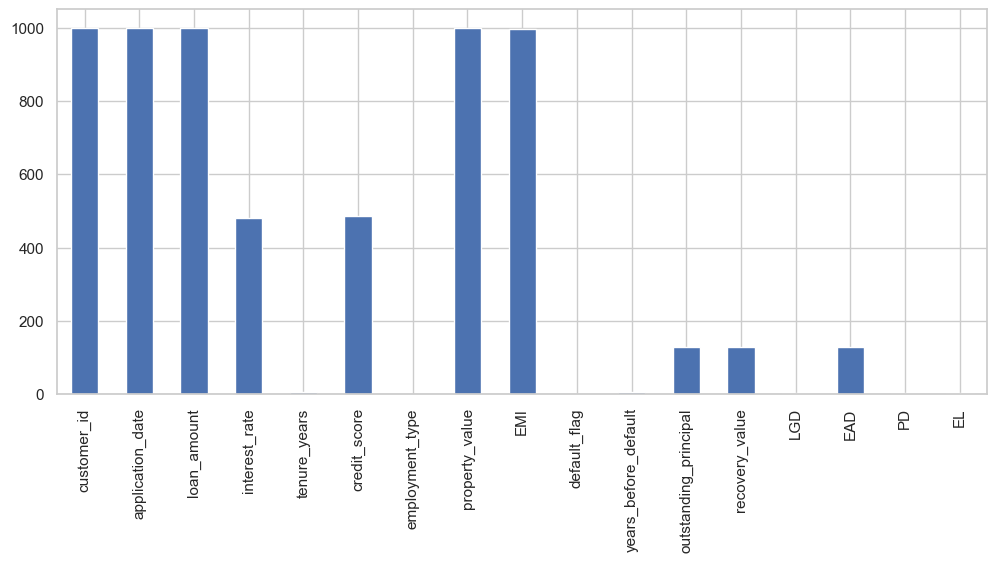

In [94]:
plt.figure(figsize=(12,5))
df.nunique().plot(kind='bar')
plt.show()

In [95]:
df.dtypes

customer_id                int64
application_date          object
loan_amount                int64
interest_rate            float64
tenure_years               int64
credit_score               int64
employment_type           object
property_value           float64
EMI                      float64
default_flag               int64
years_before_default     float64
outstanding_principal    float64
recovery_value           float64
LGD                      float64
EAD                      float64
PD                       float64
EL                       float64
dtype: object

In [96]:
df.size,df.shape

(17000, (1000, 17))

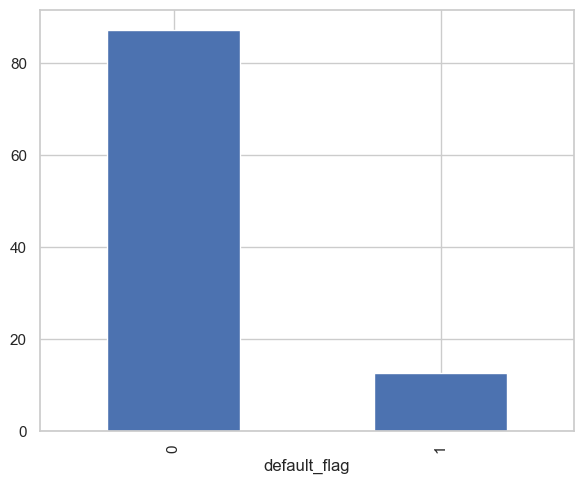

default_flag
0   87.20
1   12.80
Name: count, dtype: float64


In [97]:
plt.figure(figsize=(6,5))
(100*df['default_flag'].value_counts()/len(df)).plot(kind='bar')
plt.tight_layout()
plt.show()

print(100*df['default_flag'].value_counts()/len(df))

In [98]:
#defalut who is not able to pay the laon is 1 
""" 128 customer who have defaulted """

' 128 customer who have defaulted '

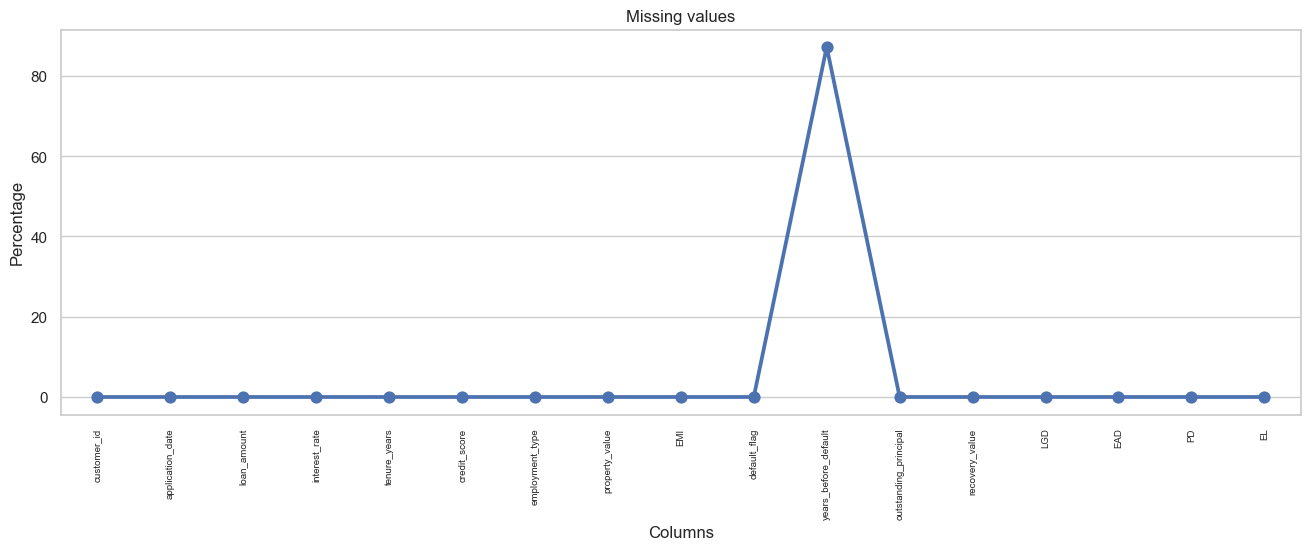

In [99]:
missing =pd.DataFrame((df.isnull().sum()*100)/df.shape[0]).reset_index()
missing.columns = ['Column', 'MissingPercent']

plt.figure(figsize=(16,5))
ax=sns.pointplot(x='Column',y='MissingPercent',data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title("Missing values")
plt.show()

In [100]:
""" Here is good news the null values is zero, only one column contains the null value will not affect 
the data and fill with"""

' Here is good news the null values is zero, only one column contains the null value will not affect \nthe data and fill with'

In [101]:
df.years_before_default.value_counts()

years_before_default
3.00    29
2.00    28
4.00    26
5.00    24
1.00    21
Name: count, dtype: int64

In [102]:
df

customer_id application_date  loan_amount  interest_rate  tenure_years  \
0              1       2015-01-01      7423388           6.63            25   
1              2       2015-01-02      7550634           8.11            10   
2              3       2015-01-03      5304572           9.75            25   
3              4       2015-01-04      3234489          10.30            30   
4              5       2015-01-05      8204212           8.05            20   
..           ...              ...          ...            ...           ...   
995          996       2017-09-22      5108880          10.67            30   
996          997       2017-09-23      6499593           6.52            30   
997          998       2017-09-24      5261946          10.22            10   
998          999       2017-09-25      1090093           8.63            10   
999         1000       2017-09-26      2732465          11.27            15   

     credit_score employment_type  property_value      EMI  default_flag  \
0             818   Self-employed     11588679.90 50728.00             0   
1             311   Self-employed      9789522.56 92049.00             0   
2             827   Self-employed      7343342.48 47271.00             0   
3             854   Self-employed      4051039.41 29105.00             0   
4             672   Self-employed      9489344.59 68879.00             0   
..            ...             ...             ...      ...           ...   
995           395        Salaried      8261587.33 47383.00             0   
996           489        Salaried      8578352.45 41167.00             0   
997           752        Salaried      7025355.43 70180.00             0   
998           491   Self-employed      1694663.69 13592.00             1   
999           785        Salaried      3118961.36 31522.00             0   

     years_before_default  outstanding_principal  recovery_value  LGD  \
0                     NaN                   0.00            0.00 0.00   
1                     NaN                   0.00            0.00 0.00   
2                     NaN                   0.00            0.00 0.00   
3                     NaN                   0.00            0.00 0.00   
4                     NaN                   0.00            0.00 0.00   
..                    ...                    ...             ...  ...   
995                   NaN                   0.00            0.00 0.00   
996                   NaN                   0.00            0.00 0.00   
997                   NaN                   0.00            0.00 0.00   
998                  3.00              763065.10      1520419.04 0.00   
999                   NaN                   0.00            0.00 0.00   

          EAD   PD   EL  
0        0.00 0.02 0.00  
1        0.00 0.30 0.00  
2        0.00 0.02 0.00  
3        0.00 0.02 0.00  
4        0.00 0.10 0.00  
..        ...  ...  ...  
995      0.00 0.30 0.00  
996      0.00 0.30 0.00  
997      0.00 0.02 0.00  
998 763065.10 0.30 0.00  
999      0.00 0.02 0.00  

[1000 rows x 17 columns]

In [103]:
# Convert the 'date' column to datetime and extract month year date column

df['application_date'] = pd.to_datetime(df['application_date'], errors='coerce')
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month
df['day'] = df['application_date'].dt.day

In [104]:
df.dtypes

customer_id                       int64
application_date         datetime64[ns]
loan_amount                       int64
interest_rate                   float64
tenure_years                      int64
credit_score                      int64
employment_type                  object
property_value                  float64
EMI                             float64
default_flag                      int64
years_before_default            float64
outstanding_principal           float64
recovery_value                  float64
LGD                             float64
EAD                             float64
PD                              float64
EL                              float64
year                              int32
month                             int32
day                               int32
dtype: object

In [105]:
df[df.years_before_default.notnull()].count()

customer_id              128
application_date         128
loan_amount              128
interest_rate            128
tenure_years             128
credit_score             128
employment_type          128
property_value           128
EMI                      128
default_flag             128
years_before_default     128
outstanding_principal    128
recovery_value           128
LGD                      128
EAD                      128
PD                       128
EL                       128
year                     128
month                    128
day                      128
dtype: int64

In [106]:
df.groupby(['employment_type','default_flag'])['loan_amount'].agg(Count='count', Max='max', Sum='sum', Min = 'min',Mean = 'mean',std= 'std')  

Count      Max         Sum      Min       Mean  \
employment_type default_flag                                                   
Salaried        0               478  9997354  2619770108  1048984 5480690.60   
                1                21  8122313   107537370  1071295 5120827.14   
Self-employed   0               394  9976973  2136088791  1039353 5421545.15   
                1               107  9929860   605015205  1076218 5654347.71   

                                    std  
employment_type default_flag             
Salaried        0            2577403.12  
                1            2037091.01  
Self-employed   0            2518748.11  
                1            2496656.91

In [107]:
df.groupby(['default_flag'])[['loan_amount','recovery_value','outstanding_principal','property_value']].agg(Count=('loan_amount', 'count'),
    Sum_loan_amount=('loan_amount', 'sum'),
    Sum_recovery=('recovery_value', 'sum'),
    Sum_os=('outstanding_principal','sum'),
    Sum_prtyvalue=('property_value','sum')                                                                                                      
)

Count  Sum_loan_amount  Sum_recovery       Sum_os  Sum_prtyvalue
default_flag                                                                  
0               872       4755858899          0.00         0.00  6431536438.71
1               128        712552575  822019831.82 599076663.29   958500149.39

In [108]:
# creat LTV column 
#loan to value ratio
df['LTV']=df['loan_amount']*100/df['property_value']

In [109]:
df.head()

customer_id application_date  loan_amount  interest_rate  tenure_years  \
0            1       2015-01-01      7423388           6.63            25   
1            2       2015-01-02      7550634           8.11            10   
2            3       2015-01-03      5304572           9.75            25   
3            4       2015-01-04      3234489          10.30            30   
4            5       2015-01-05      8204212           8.05            20   

   credit_score employment_type  property_value      EMI  default_flag  ...  \
0           818   Self-employed     11588679.90 50728.00             0  ...   
1           311   Self-employed      9789522.56 92049.00             0  ...   
2           827   Self-employed      7343342.48 47271.00             0  ...   
3           854   Self-employed      4051039.41 29105.00             0  ...   
4           672   Self-employed      9489344.59 68879.00             0  ...   

   outstanding_principal  recovery_value  LGD  EAD   PD   EL  year  month  \
0                   0.00            0.00 0.00 0.00 0.02 0.00  2015      1   
1                   0.00            0.00 0.00 0.00 0.30 0.00  2015      1   
2                   0.00            0.00 0.00 0.00 0.02 0.00  2015      1   
3                   0.00            0.00 0.00 0.00 0.02 0.00  2015      1   
4                   0.00            0.00 0.00 0.00 0.10 0.00  2015      1   

   day   LTV  
0    1 64.06  
1    2 77.13  
2    3 72.24  
3    4 79.84  
4    5 86.46  

[5 rows x 21 columns]

In [110]:
df.LTV.describe()

count   1000.00
mean      74.94
std        8.80
min       60.04
25%       67.68
50%       74.70
75%       82.74
max       89.99
Name: LTV, dtype: float64

In [111]:
#create a column to credit_score bucket as per risk --- HIGH , MEDIEM , LOW
""" Here's a breakdown of the CIBIL score ranges and their associated risk levels: 
Excellent (750-900):
Indicates a low-risk borrower, with a strong credit history and good chances of securing loans and credit cards at favorable terms. 
Very Good (700-749):
Suggests a healthy credit profile, leading to easy loan approvals and potentially better interest rates. 
Good (650-699):
While still eligible for loans and credit cards, individuals in this range may need to improve their score to secure better terms and interest rates. 
Fair (580-649):
Indicates a moderate risk to lenders, potentially leading to higher interest rates or stricter loan terms. 
Poor (300-579):"""
def credit_bucket(score):
    if 300 <= score <= 579:
        return 'High_Risk'
    elif 580 <= score <= 699:
        return 'Moderate_Risk'
    else:
        return 'Low_Risk'

# Apply it to the column
df['Credit_score_risk_bucket'] = df['credit_score'].apply(credit_bucket)



In [112]:
df.groupby(['default_flag','Credit_score_risk_bucket'])['loan_amount'].agg(Count='count', Sum='sum')

Count         Sum
default_flag Credit_score_risk_bucket                   
0            High_Risk                   354  1975507131
             Low_Risk                    335  1742436409
             Moderate_Risk               183  1037915359
1            High_Risk                   100   538483534
             Low_Risk                     18   117592694
             Moderate_Risk                10    56476347

In [113]:
df['Credit_score_risk_bucket'].value_counts()


Credit_score_risk_bucket
High_Risk        454
Low_Risk         353
Moderate_Risk    193
Name: count, dtype: int64

In [114]:
# loan has disbursed to high and modearte that is indication the portfolio quality

In [115]:
df['loan_size'] = df['loan_amount'].apply(
    lambda x: 'Small' if x < 300000 else 'Medium' if x < 1000000 else 'Large'
)

In [116]:
df.head()

customer_id application_date  loan_amount  interest_rate  tenure_years  \
0            1       2015-01-01      7423388           6.63            25   
1            2       2015-01-02      7550634           8.11            10   
2            3       2015-01-03      5304572           9.75            25   
3            4       2015-01-04      3234489          10.30            30   
4            5       2015-01-05      8204212           8.05            20   

   credit_score employment_type  property_value      EMI  default_flag  ...  \
0           818   Self-employed     11588679.90 50728.00             0  ...   
1           311   Self-employed      9789522.56 92049.00             0  ...   
2           827   Self-employed      7343342.48 47271.00             0  ...   
3           854   Self-employed      4051039.41 29105.00             0  ...   
4           672   Self-employed      9489344.59 68879.00             0  ...   

   LGD  EAD   PD   EL  year  month  day   LTV  Credit_score_risk_bucket  \
0 0.00 0.00 0.02 0.00  2015      1    1 64.06                  Low_Risk   
1 0.00 0.00 0.30 0.00  2015      1    2 77.13                 High_Risk   
2 0.00 0.00 0.02 0.00  2015      1    3 72.24                  Low_Risk   
3 0.00 0.00 0.02 0.00  2015      1    4 79.84                  Low_Risk   
4 0.00 0.00 0.10 0.00  2015      1    5 86.46             Moderate_Risk   

   loan_size  
0      Large  
1      Large  
2      Large  
3      Large  
4      Large  

[5 rows x 23 columns]

In [117]:
df.dtypes

customer_id                          int64
application_date            datetime64[ns]
loan_amount                          int64
interest_rate                      float64
tenure_years                         int64
credit_score                         int64
employment_type                     object
property_value                     float64
EMI                                float64
default_flag                         int64
years_before_default               float64
outstanding_principal              float64
recovery_value                     float64
LGD                                float64
EAD                                float64
PD                                 float64
EL                                 float64
year                                 int32
month                                int32
day                                  int32
LTV                                float64
Credit_score_risk_bucket            object
loan_size                           object
dtype: obje

In [118]:
df= df.astype({'default_flag': object})

# data cleaning

In [119]:
#impute the value bcz the have not default
df['years_before_default']=df['years_before_default'].fillna(0)

In [120]:
df.isnull().sum(),df.dtypes

(customer_id                 0
 application_date            0
 loan_amount                 0
 interest_rate               0
 tenure_years                0
 credit_score                0
 employment_type             0
 property_value              0
 EMI                         0
 default_flag                0
 years_before_default        0
 outstanding_principal       0
 recovery_value              0
 LGD                         0
 EAD                         0
 PD                          0
 EL                          0
 year                        0
 month                       0
 day                         0
 LTV                         0
 Credit_score_risk_bucket    0
 loan_size                   0
 dtype: int64,
 customer_id                          int64
 application_date            datetime64[ns]
 loan_amount                          int64
 interest_rate                      float64
 tenure_years                         int64
 credit_score                         int64
 employm

## Univariate analysis 

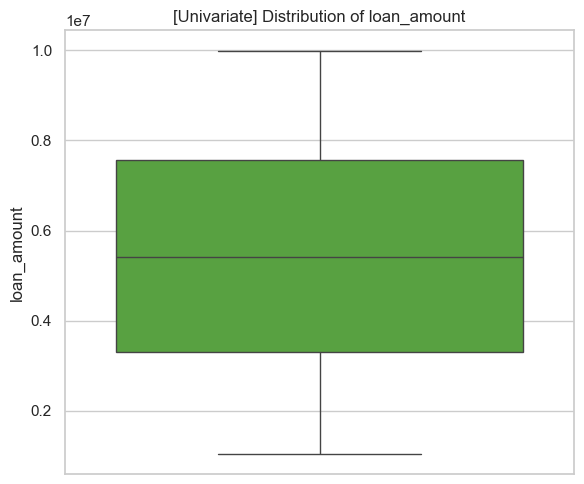

loan_amount: 0 outliers


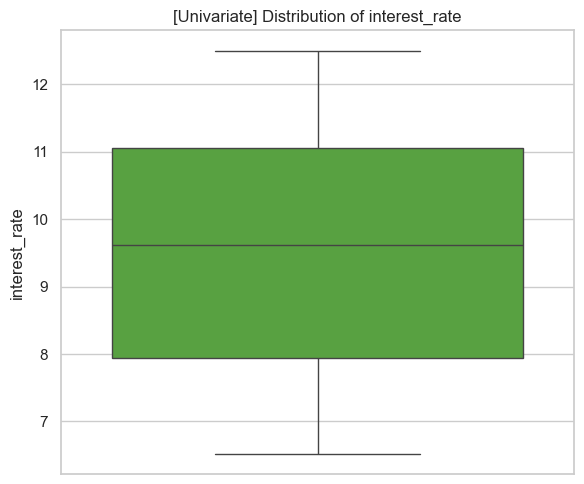

interest_rate: 0 outliers


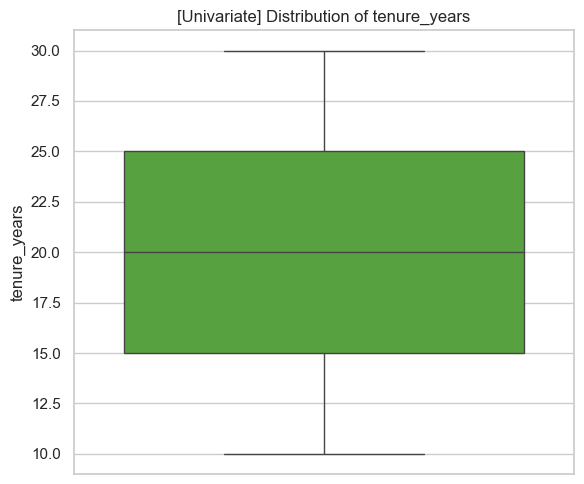

tenure_years: 0 outliers


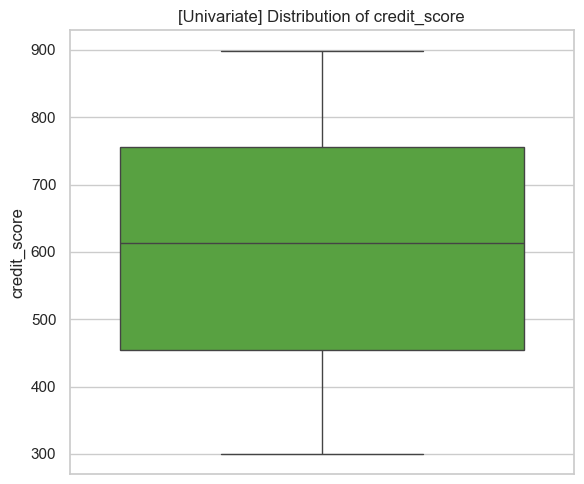

credit_score: 0 outliers


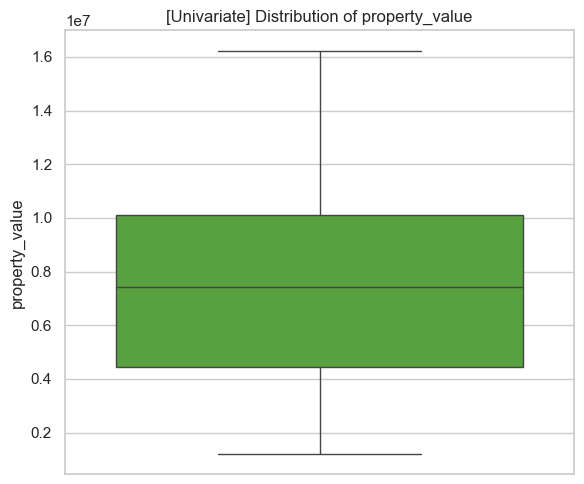

property_value: 0 outliers


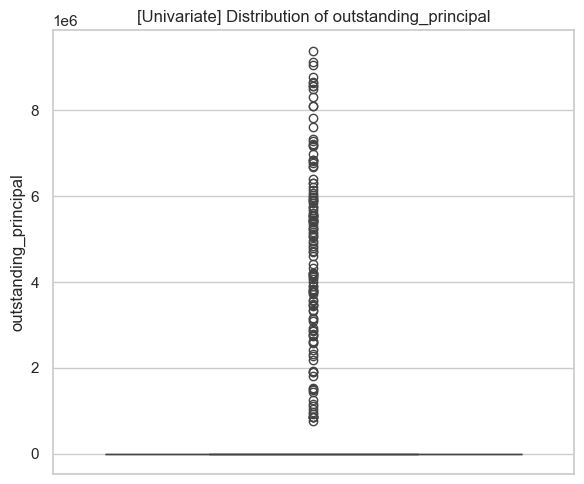

outstanding_principal: 128 outliers


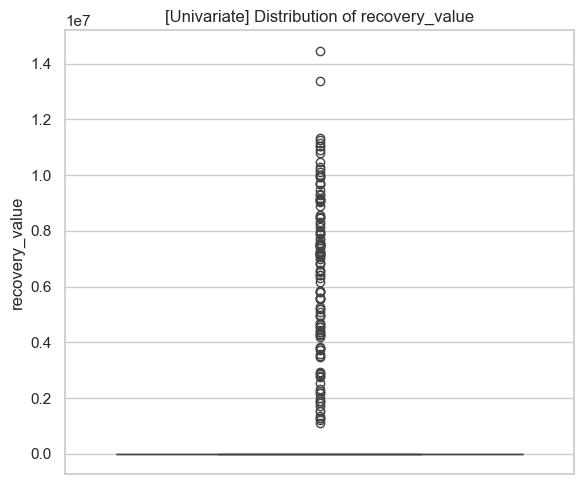

recovery_value: 128 outliers


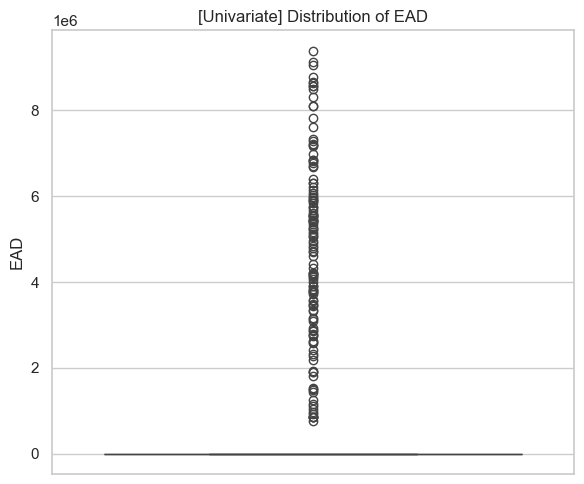

EAD: 128 outliers


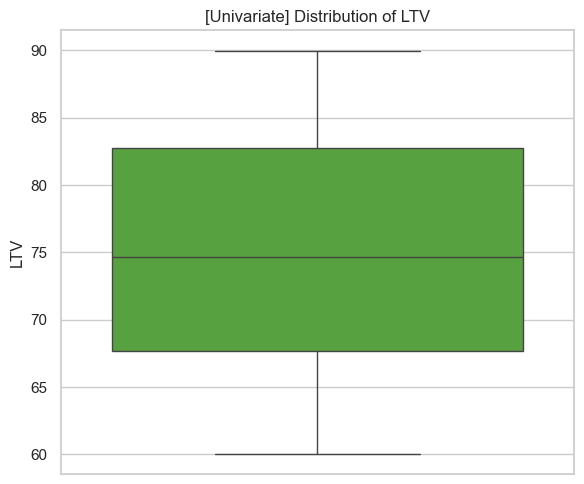

LTV: 0 outliers


In [121]:

# Columns to exclude from analysis
exclude_cols = ['customer_id','application_date','EL','PD','LGD','year','month','day','years_before_default','EMI']

# Set style
sns.set(style='whitegrid')

# Color palette
colors = sns.color_palette('husl')
# Loop through columns (excluding ID/date/target)
for col in df.drop(columns=exclude_cols, errors='ignore').columns:
    
    # ========== UNIVARIATE ANALYSIS for outliers detection ==========
    if df[col].dtype == 'object':
        continue

    elif df[col].dtype in ['int32', 'int64', 'float64']:
        plt.figure(figsize=(6, 5))
        sns.boxplot(df[col].dropna(), color=colors[color_idx % len(colors)])
        plt.title(f'[Univariate] Distribution of {col}')
        plt.tight_layout()
        plt.show()


        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"{col}: {len(outliers)} outliers")


In [ ]:
## there is no outliers in the data set 

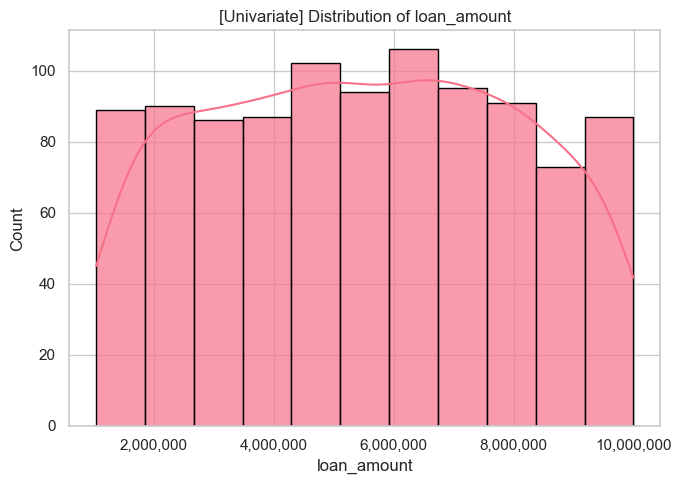

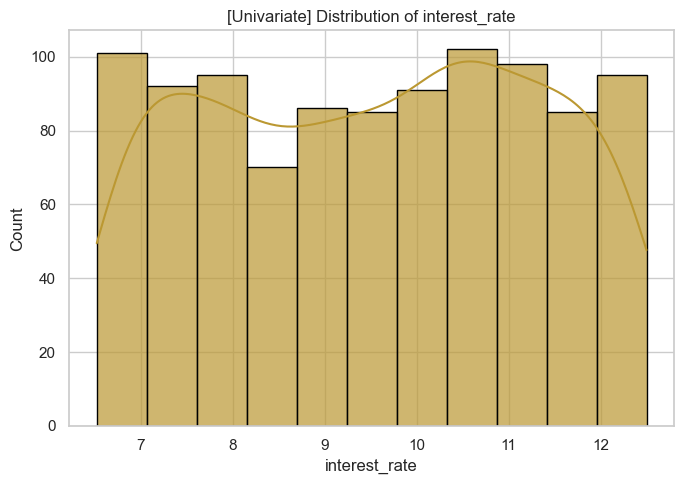

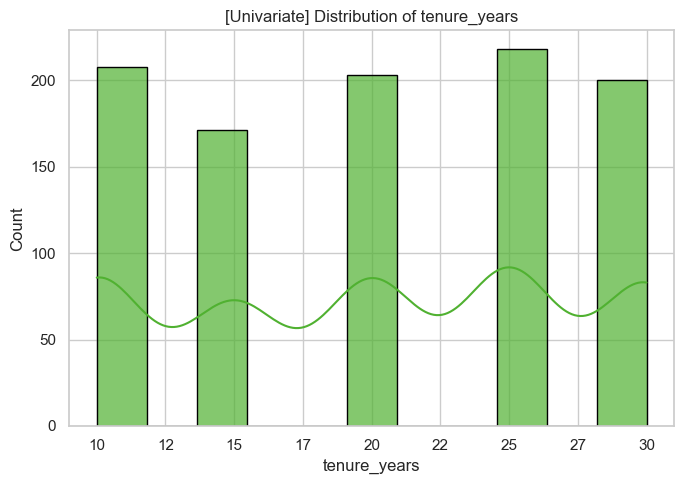

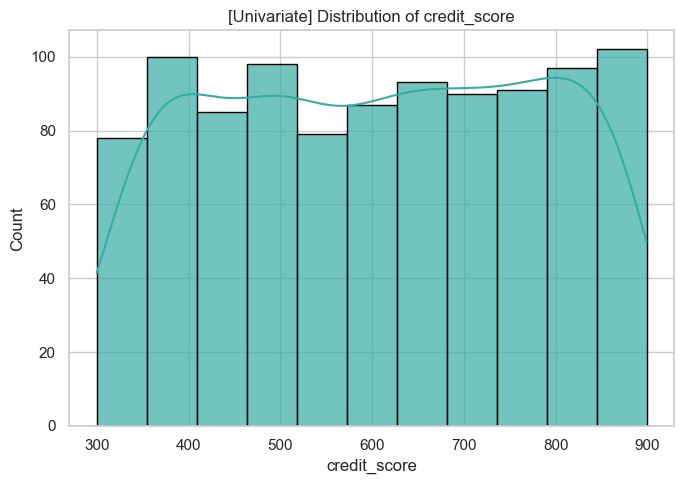

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\1312814472.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


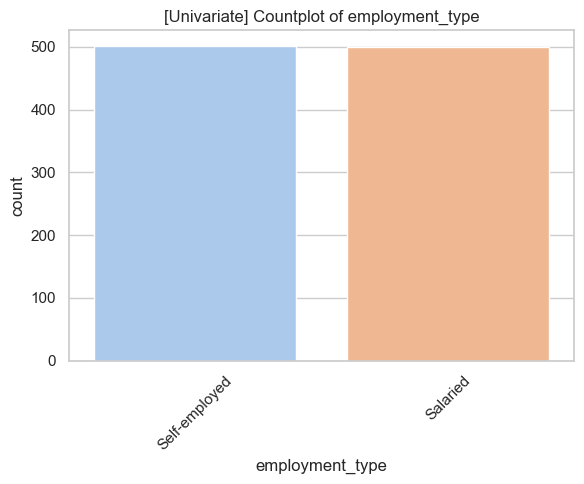

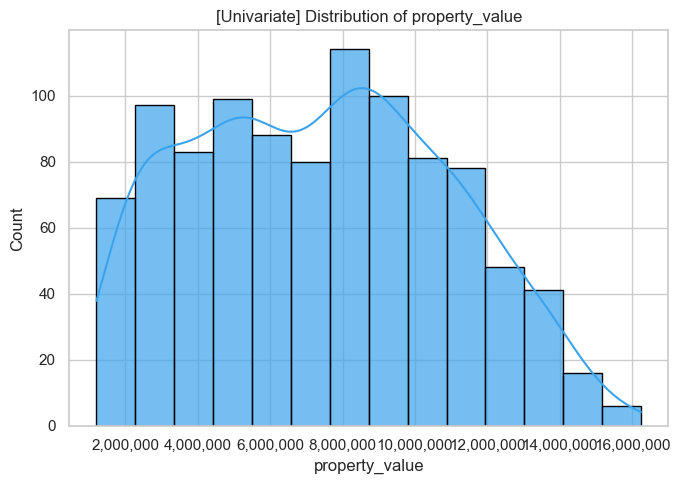

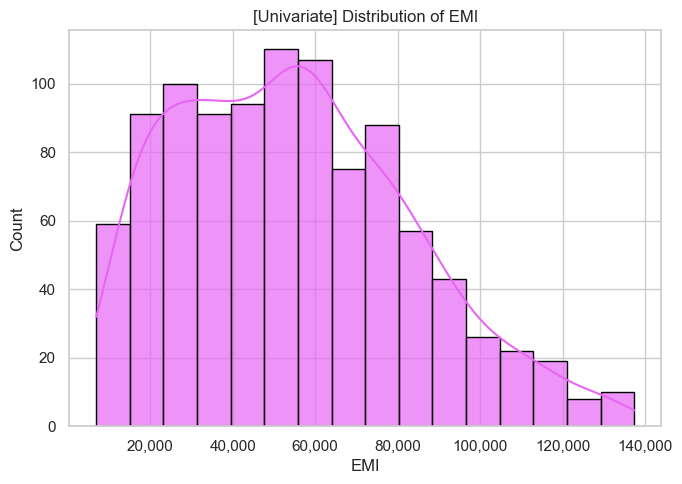

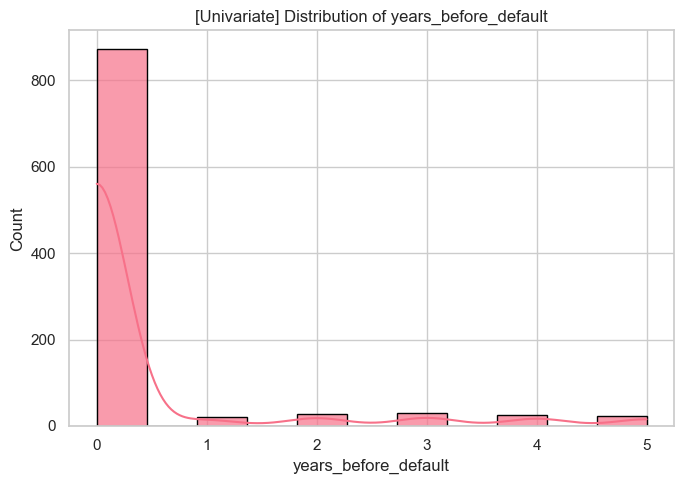

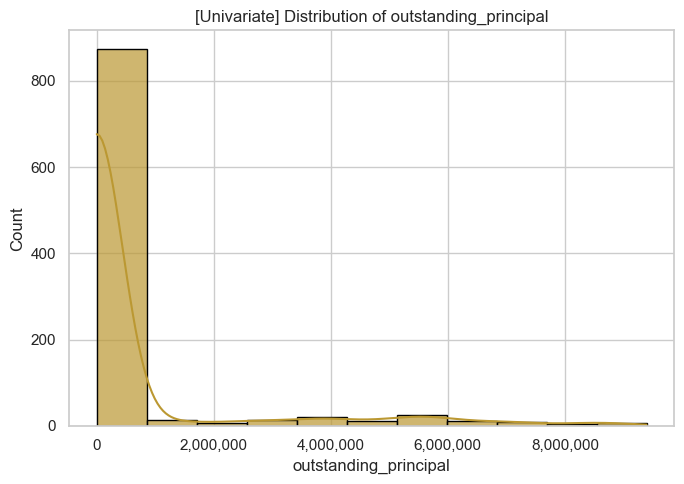

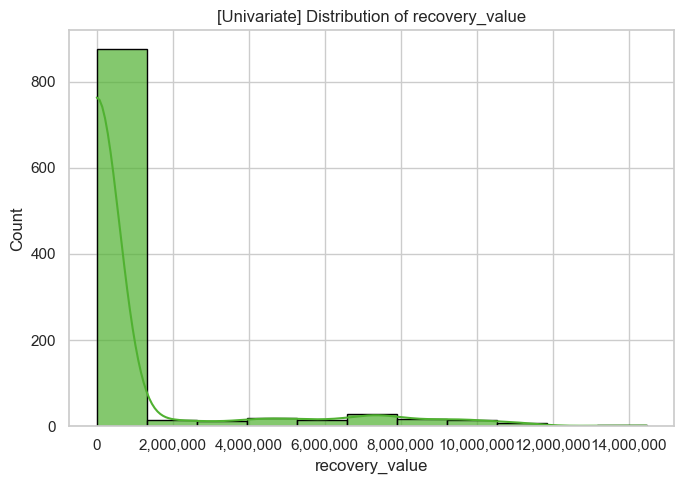

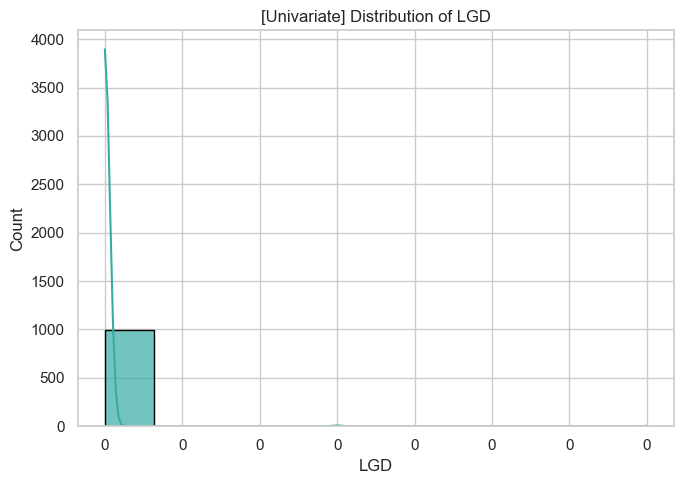

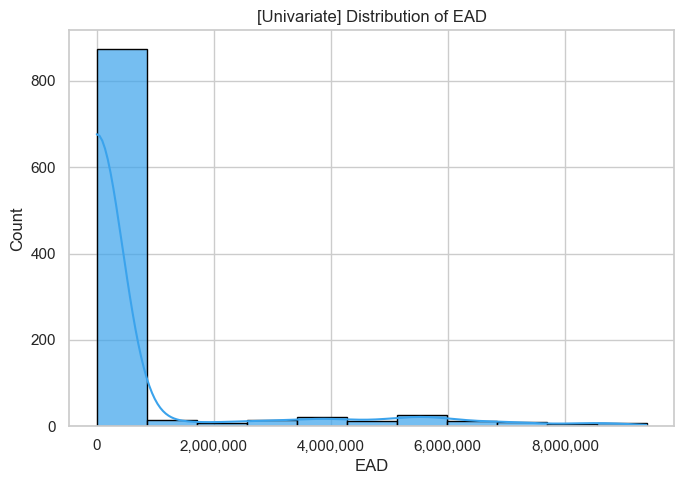

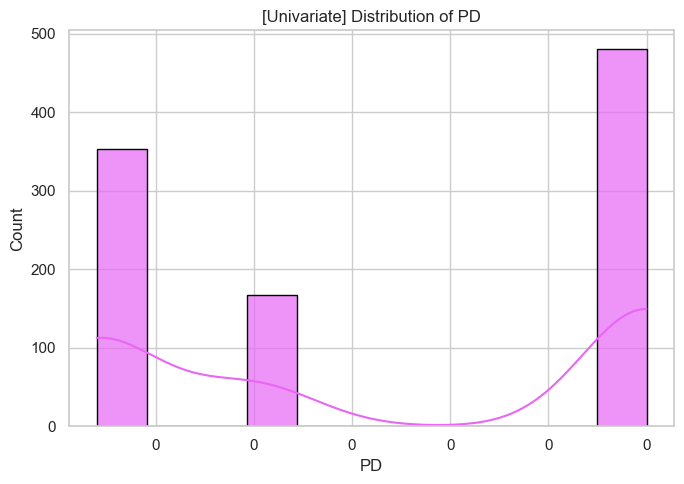

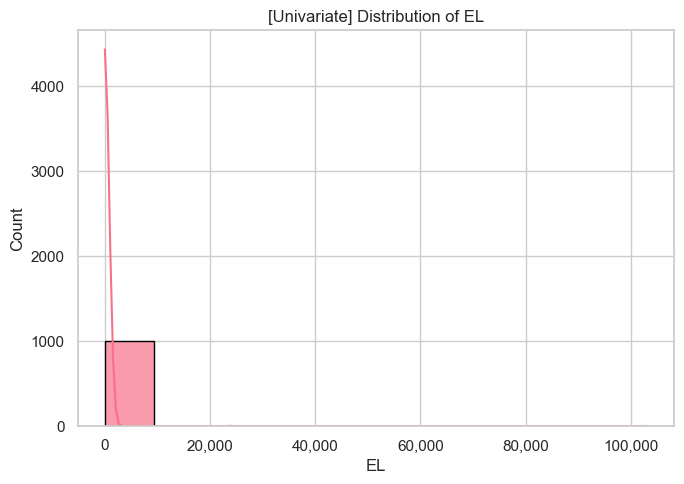

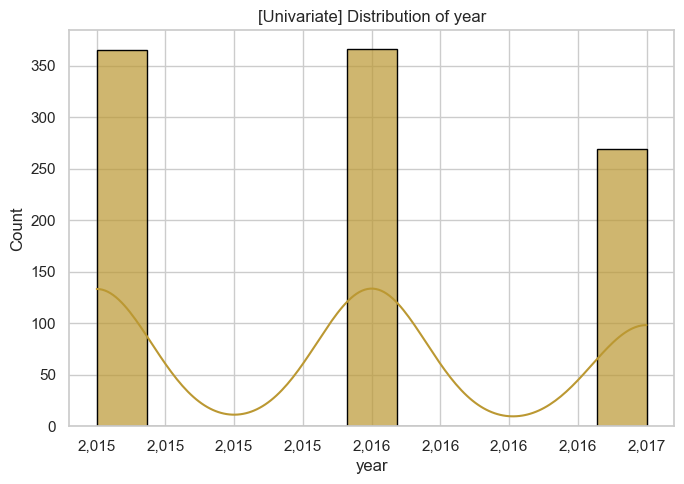

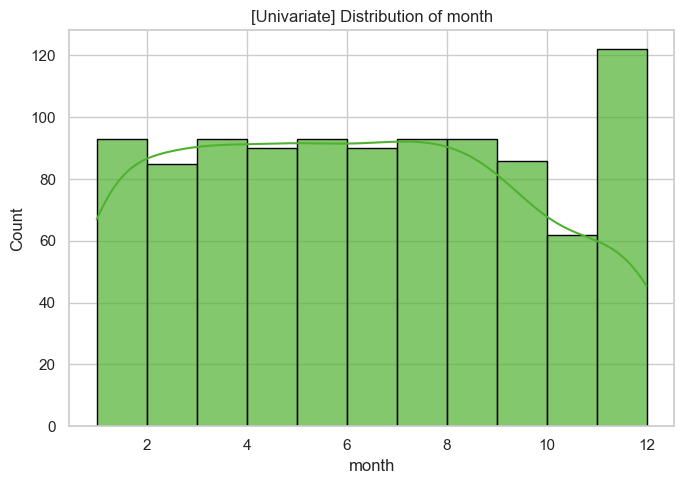

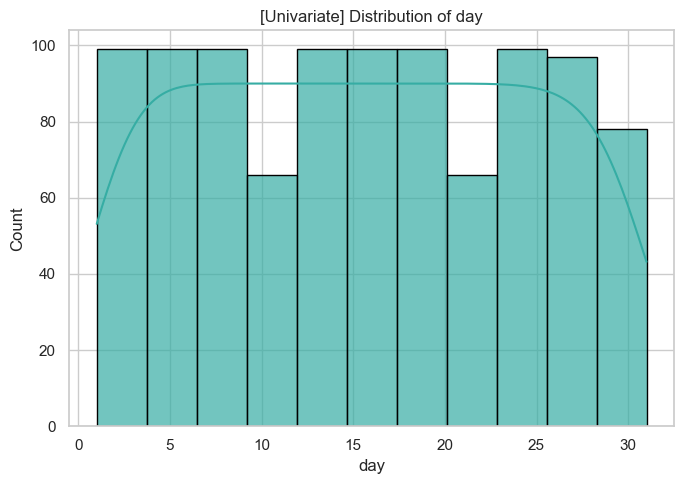

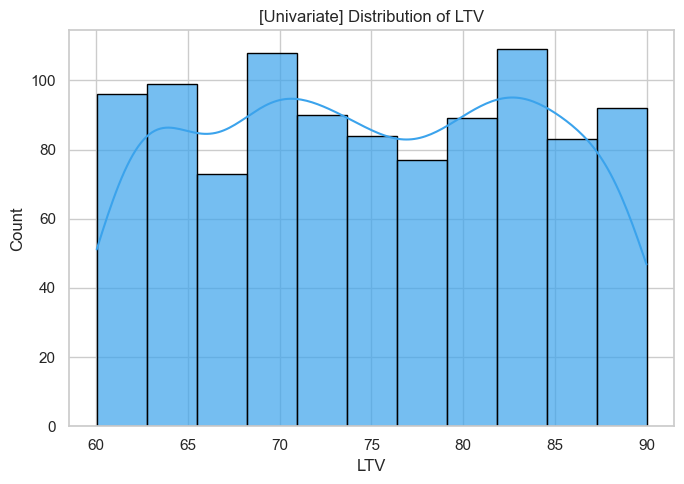

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\1312814472.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


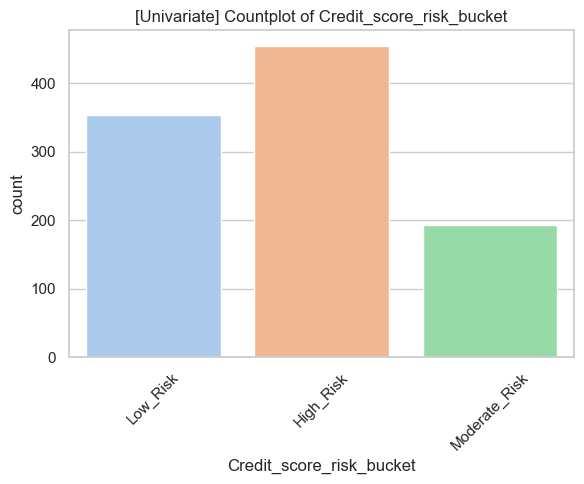

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\1312814472.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


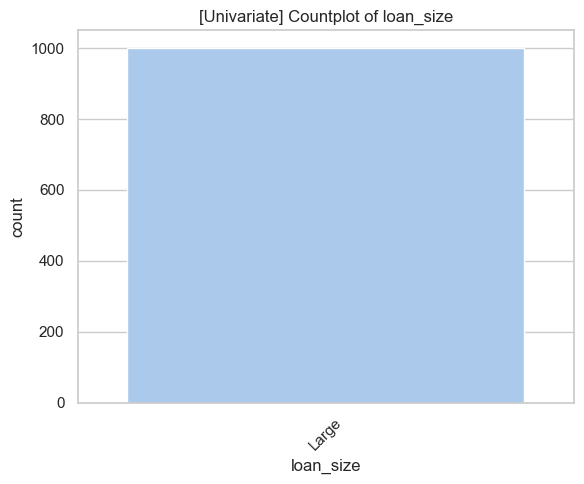

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set style
sns.set(style='whitegrid')

# Color palette
colors = sns.color_palette('husl')

# Columns to exclude
exclude_cols = ['customer_id', 'application_date', 'default_flag']
color_idx = 0  # for rotating colors

# Loop through remaining columns
for col in df.drop(columns=exclude_cols, errors='ignore').columns:
    
    # ==== CATEGORICAL (Object) ====
    if df[col].dtype == 'object':
        plt.figure(figsize=(6, 5))
        sns.countplot(data=df, x=col, palette='pastel')
        plt.title(f'[Univariate] Countplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # ==== NUMERIC ====
    elif df[col].dtype in ['int32', 'int64', 'float64']:
        plt.figure(figsize=(7, 5))
        sns.histplot(df[col].dropna(), kde=True, color=colors[color_idx % len(colors)], edgecolor='black', alpha=0.7)

        # Optional: Format large x-axis values with commas
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

        plt.title(f'[Univariate] Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

        color_idx += 1

        

# intuition from one by one feature
1. loan amount --- there is average loan amount is ~55lakh.
2. interest rte - there is average interest rate is 9.53.
3. tenure_years--- there is average tenure 20.
4. credit score -- there average credit score is !607
5. property value - -- the average colletral is 74lkh.
6. years before deafult--- those customers are getting defualt after 1 year of loan disbursment.
7. month  - most of loan disbursed in the 12month of the year.
8. credit risk - this shows there are more customer in high risk bucket that is not good for company financial health.
9. type of customer - salried and selfemployed are equally.

These insights focus on the characteristics and distributions of single variables:

1. Default Rate: 12.8% of customers (128 out of 1000) defaulted. (Focuses on default_flag).
# Loan Portfolio Overview (Individual Metrics):
2. Average loan ticket size is approximately 54.68 lakh. (Focuses on loan_amount)
3. About 75% of disbursed loans are up to 76 lakh. (Focuses on loan_amount)
4. Average property value is around 74 lakh. (Focuses on property_value)
5. Interest Rate Distribution: 75% of loans have an interest rate below 11.05%, 50% below 9.61%, and 25% below 7.94%. (Focuses on interest_rate)
Credit Score Distribution:
6. Credit scores are categorized into High (300-579), Moderate (580-699), and Low (700-900).
Approximately 25% of customers have a credit score under 454.75 (high-risk), 50% under 612.50 (moderate-risk), and 75% under 756 (low-risk). (Focuses on credit_score)
7. Missing Values: "years_before_default" is the only column with significant missing values (87.2%), which were imputed to 0. (Focuses on years_before_default data quality)
Outlier Detection: Outliers were identified in outstanding_principal, recovery_value, and EAD (128 outliers each). (Focuses on individual variable distributions)

In [124]:
df.describe()

customer_id     application_date  loan_amount  interest_rate  \
count      1000.00                 1000      1000.00        1000.00   
mean        500.50  2016-05-14 12:00:00   5468411.47           9.53   
min           1.00  2015-01-01 00:00:00   1039353.00           6.52   
25%         250.75  2015-09-07 18:00:00   3303918.50           7.94   
50%         500.50  2016-05-14 12:00:00   5422540.50           9.61   
75%         750.25  2017-01-19 06:00:00   7556018.00          11.05   
max        1000.00  2017-09-26 00:00:00   9997354.00          12.50   
std         288.82                  NaN   2533625.79           1.76   

       tenure_years  credit_score  property_value       EMI  \
count       1000.00       1000.00         1000.00   1000.00   
mean          20.16        606.25      7390036.59  54687.32   
min           10.00        300.00      1209009.56   6906.00   
25%           15.00        454.75      4435144.43  31482.00   
50%           20.00        612.50      7421453.57  52870.00   
75%           25.00        756.00     10121493.31  74213.00   
max           30.00        899.00     16237644.80 137373.00   
std            7.11        173.89      3533530.83  28403.50   

       years_before_default  outstanding_principal  recovery_value     LGD  \
count               1000.00                1000.00         1000.00 1000.00   
mean                   0.39              599076.66       822019.83    0.00   
min                    0.00                   0.00            0.00    0.00   
25%                    0.00                   0.00            0.00    0.00   
50%                    0.00                   0.00            0.00    0.00   
75%                    0.00                   0.00            0.00    0.00   
max                    5.00             9394476.85     14470638.96    0.07   
std                    1.12             1751299.26      2387437.16    0.00   

             EAD      PD        EL    year   month     day     LTV  
count    1000.00 1000.00   1000.00 1000.00 1000.00 1000.00 1000.00  
mean   599076.66    0.17    132.29 2015.90    6.10   15.67   74.94  
min         0.00    0.02      0.00 2015.00    1.00    1.00   60.04  
25%         0.00    0.02      0.00 2015.00    3.00    8.00   67.68  
50%         0.00    0.10      0.00 2016.00    6.00   16.00   74.70  
75%         0.00    0.30      0.00 2017.00    9.00   23.00   82.74  
max   9394476.85    0.30 103071.68 2017.00   12.00   31.00   89.99  
std   1751299.26    0.13   3347.40    0.79    3.31    8.78    8.80

## Bivariate Analysis

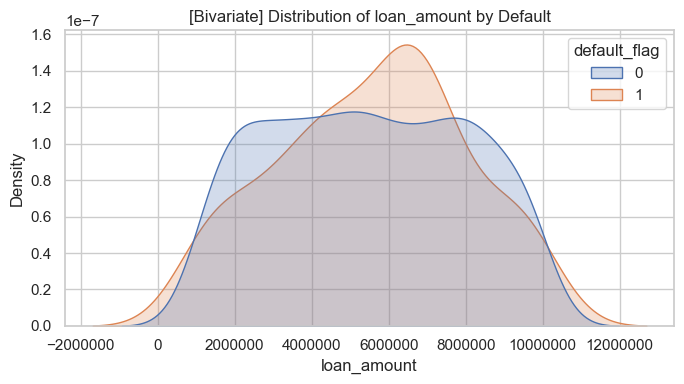

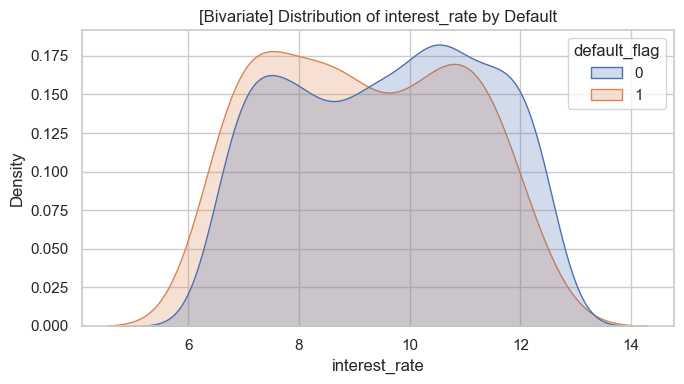

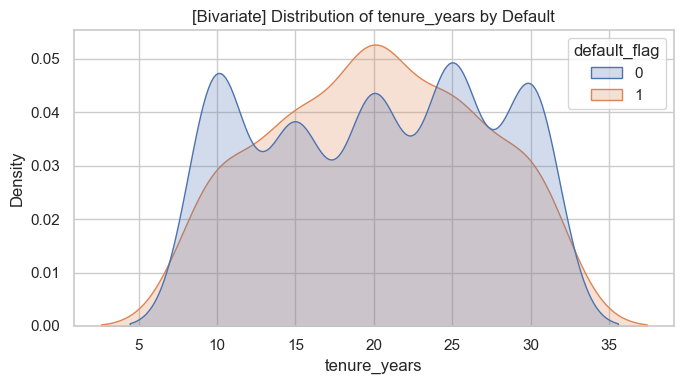

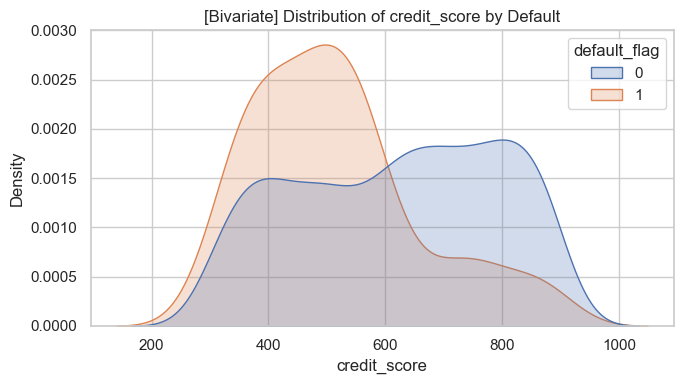

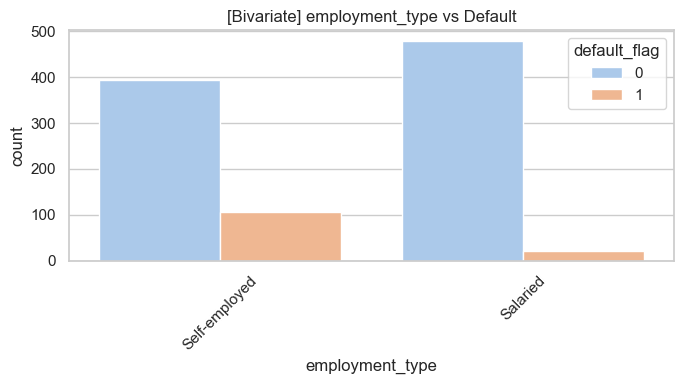

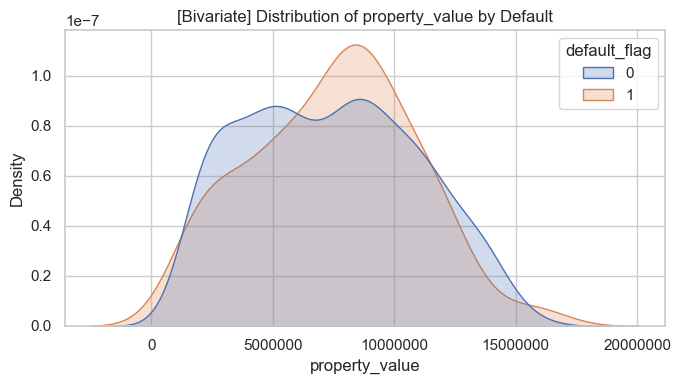

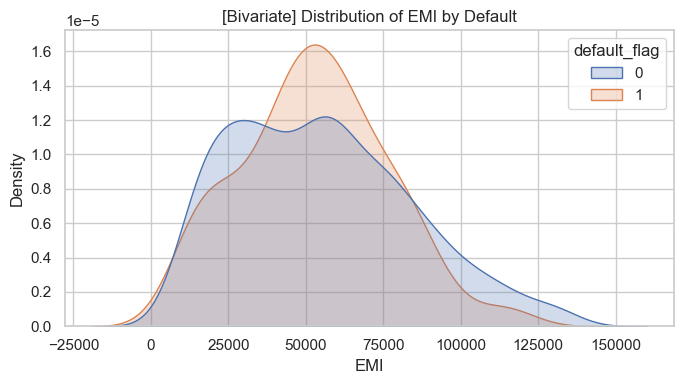

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


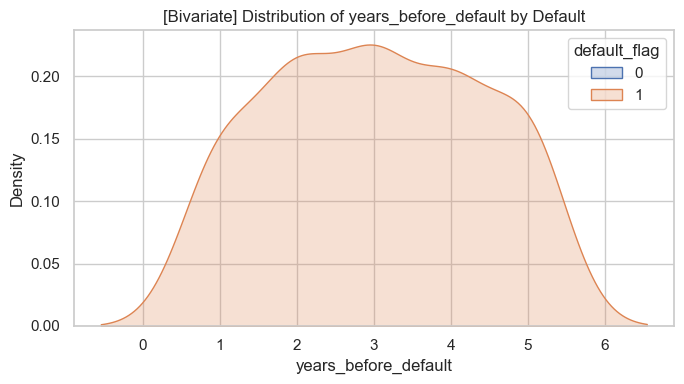

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


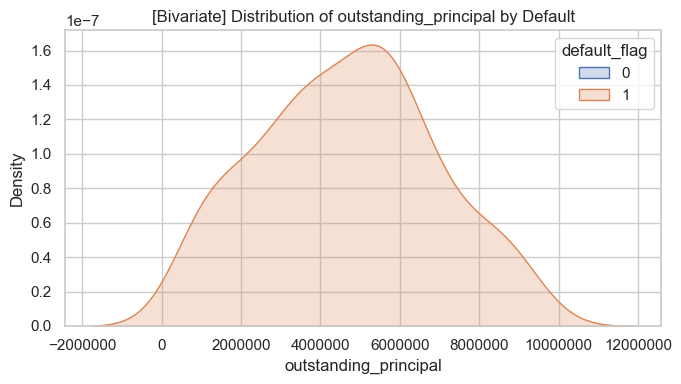

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


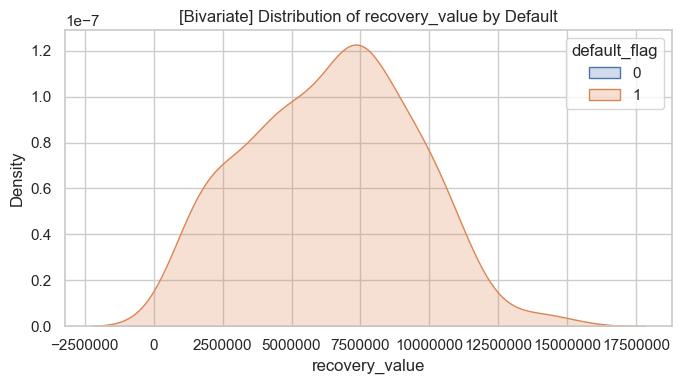

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


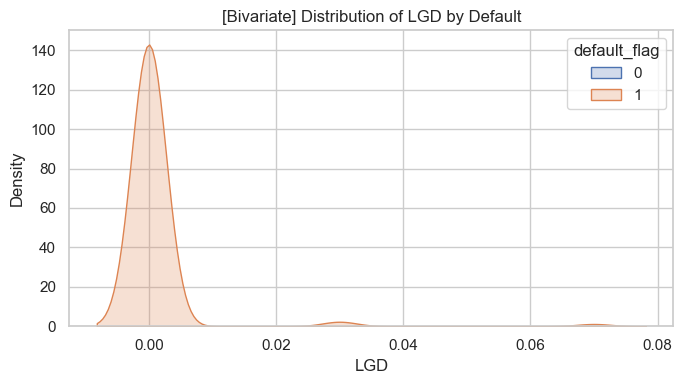

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


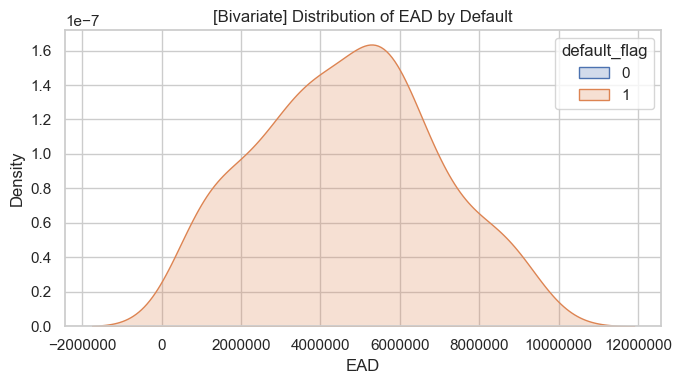

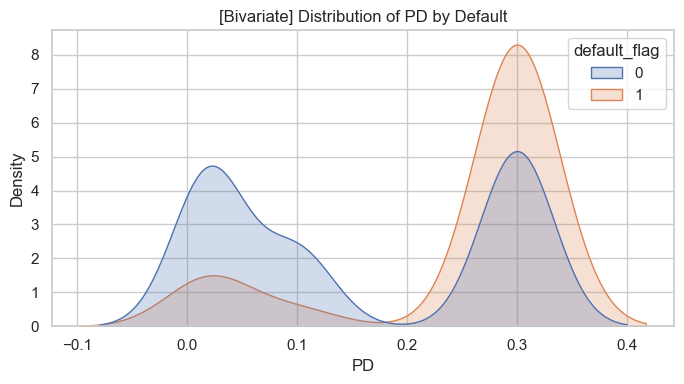

C:\Users\DELL\AppData\Local\Temp\ipykernel_10280\4226126530.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)


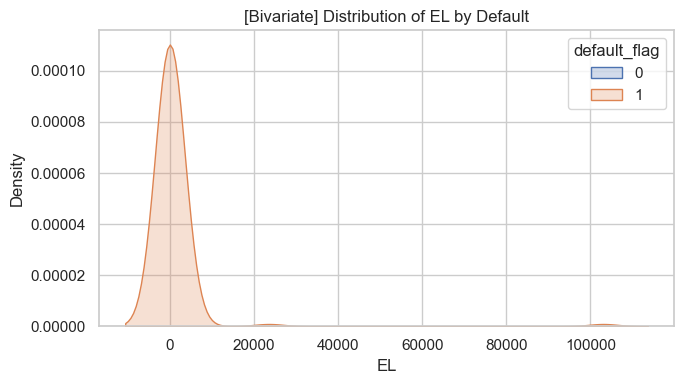

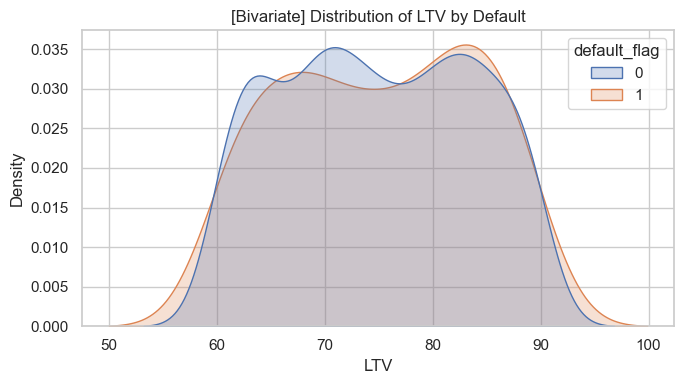

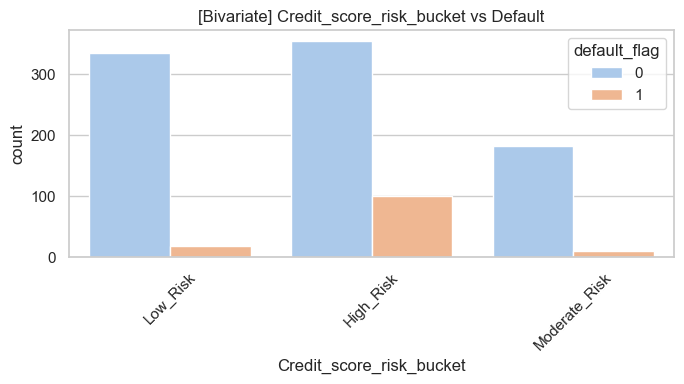

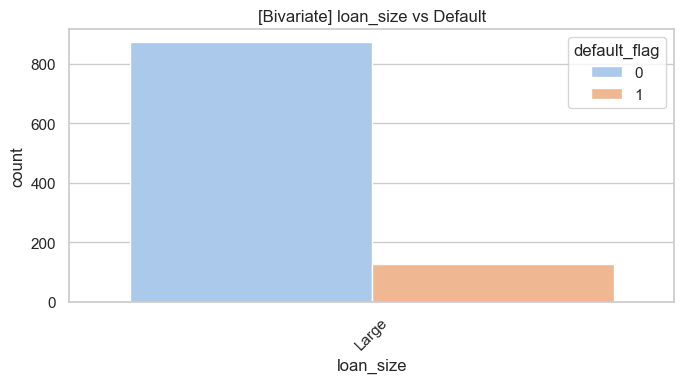

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Set theme
sns.set(style='whitegrid')

# Color palette
colors = sns.color_palette('tab10')
color_idx = 0

# Columns to exclude
exclude_cols = ['customer_id', 'application_date']

# Loop through columns for bivariate plots
for idx, col in enumerate(df.drop(columns=exclude_cols, errors='ignore').columns):
    
    if col == 'default_flag':
        continue
    
    # Categorical variables
    if df[col].dtype == 'object':
        plt.figure(figsize=(7, 4))
        sns.countplot(data=df, x=col, hue='default_flag', palette='pastel')
        plt.title(f'[Bivariate] {col} vs Default')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Numerical variables
    elif df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(7, 4))
        sns.kdeplot(data=df, x=col, hue='default_flag', fill=True, common_norm=False)
        plt.title(f'[Bivariate] Distribution of {col} by Default')

        # ✅ Disable scientific notation
        plt.ticklabel_format(style='plain', axis='both')
        plt.gca().yaxis.set_major_formatter(ScalarFormatter())

        plt.tight_layout()
        plt.show()

        color_idx += 1


    

## Bivariate Insights
These insights explore relationships or comparisons between two variables:

1. Loan to Value (LTV) Ratio: The mean LTV is 74.94%, with a range between 60.04% and 89.99%. (Relationship between loan_amount and property_value)
2. Employment Type and Default: More self-employed customers (107) defaulted compared to salaried customers (21). (Relationship between employment_type and default_flag)
3. Default by Credit Score Risk Bucket:
4. 100 high-risk customers defaulted.
5. 18 low-risk customers defaulted.
6. 10 moderate-risk customers defaulted. (Relationship between credit_score_risk_bucket and default_flag)
7. the self employed customers are getting more default as compare to salaried.
8. 

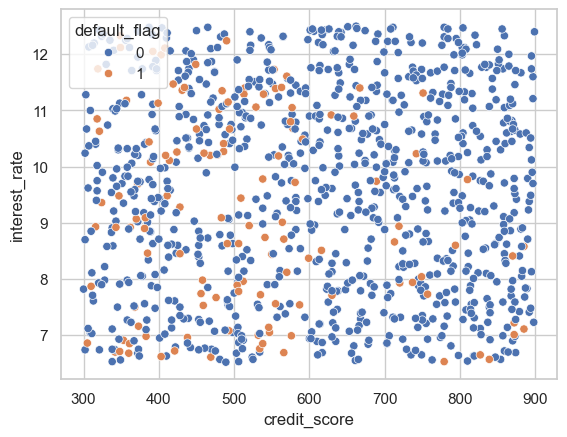

credit_score  interest_rate
credit_score           1.00          -0.00
interest_rate         -0.00           1.00

In [207]:
# find the relation between credit score and interst rate
sns.scatterplot(x='credit_score', y='interest_rate', data=df,hue='default_flag')
plt.show()

df[['credit_score', 'interest_rate']].corr()

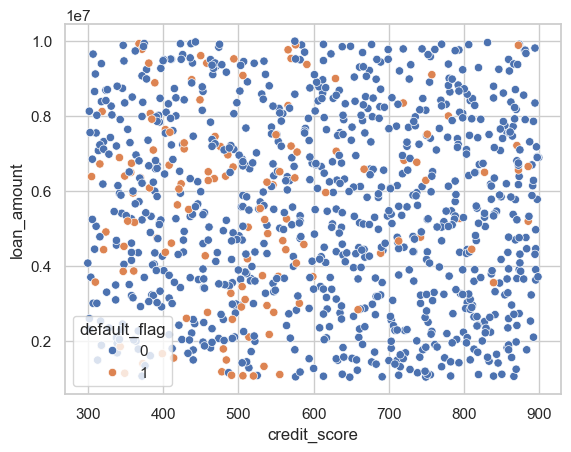

credit_score  loan_amount
credit_score          1.00        -0.04
loan_amount          -0.04         1.00

In [206]:
# find the relation between credit score and interst rate
sns.scatterplot(x='credit_score', y='loan_amount', data=df,hue='default_flag')
plt.show()

df[['credit_score', 'loan_amount']].corr()

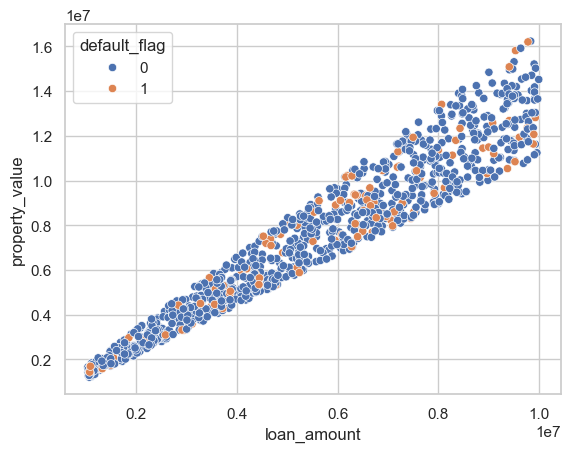

loan_amount  property_value
loan_amount            1.00            0.96
property_value         0.96            1.00

In [205]:
# find the relation between credit score and interst rate
sns.scatterplot(x='loan_amount', y='property_value', data=df,hue='default_flag')
plt.show()

df[['loan_amount', 'property_value']].corr()

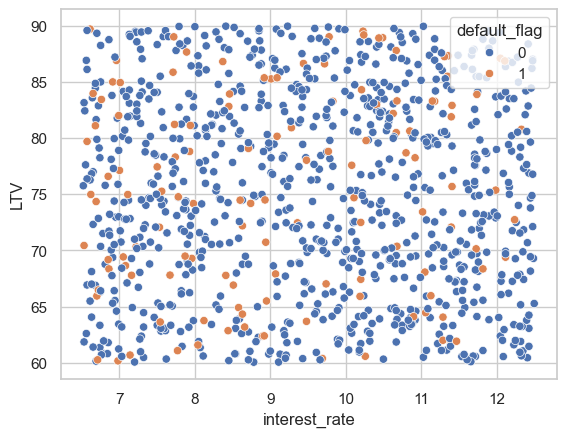

interest_rate   LTV
interest_rate           1.00 -0.02
LTV                    -0.02  1.00

In [204]:
# find the relation between credit score and interst rate
sns.scatterplot(x=df['interest_rate'],y=df['LTV'],data=df,hue='default_flag')
plt.show()

df[['interest_rate', 'LTV']].corr()

135.14046306195993

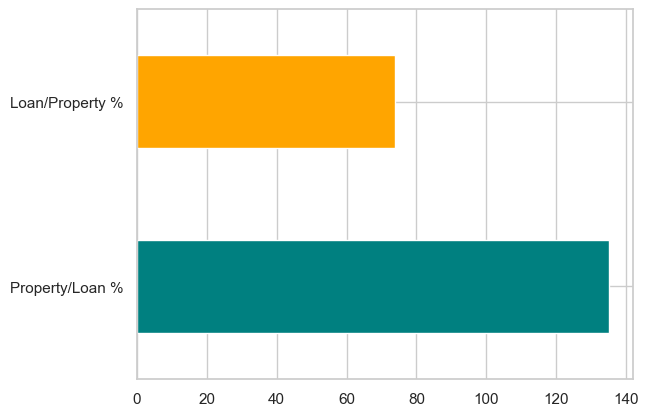

In [160]:
data = {
    'Property/Loan %': 100 * sum(df['property_value']) / sum(df['loan_amount']),
    'Loan/Property %': 100 * sum(df['loan_amount']) / sum(df['property_value'])
}
pd.Series(data).plot(kind='barh', color=['teal', 'orange'])

100*sum(df['property_value'])/sum(df['loan_amount'])

In [161]:
df.columns

Index(['customer_id', 'application_date', 'loan_amount', 'interest_rate',
       'tenure_years', 'credit_score', 'employment_type', 'property_value',
       'EMI', 'default_flag', 'years_before_default', 'outstanding_principal',
       'recovery_value', 'LGD', 'EAD', 'PD', 'EL', 'year', 'month', 'day',
       'LTV', 'Credit_score_risk_bucket', 'loan_size'],
      dtype='object')

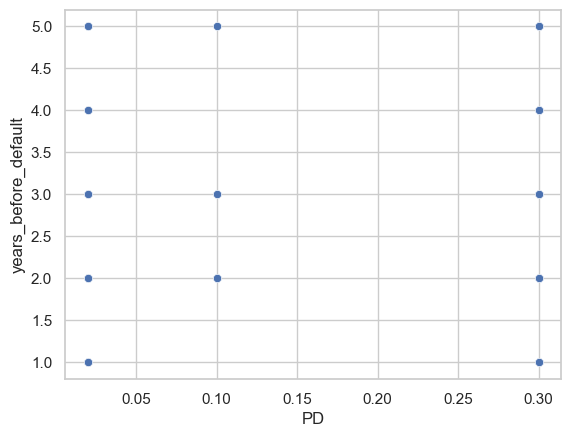

In [166]:
sns.scatterplot(
    x='PD',
    y='years_before_default',
    data=df[df['years_before_default'] != 0]
)
plt.show()


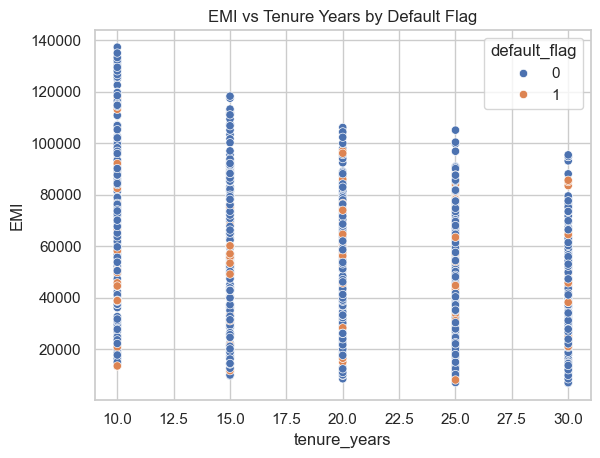

In [212]:
# Scatter plot EMI vs tenure_years
sns.scatterplot(data=df, x='tenure_years', y='EMI', hue='default_flag')
plt.title('EMI vs Tenure Years by Default Flag')
plt.show()

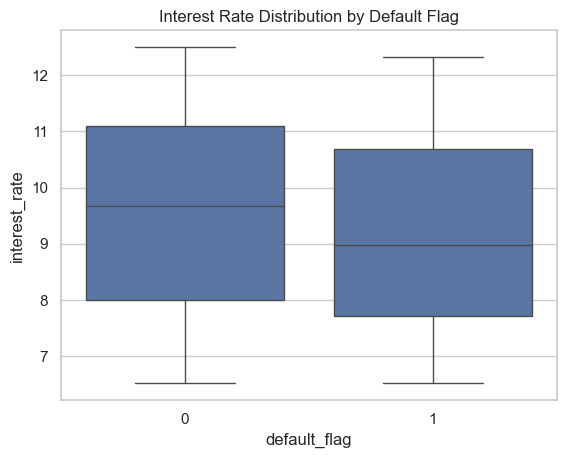

In [213]:
# Boxplot interest rate by default
sns.boxplot(x='default_flag', y='interest_rate', data=df)
plt.title('Interest Rate Distribution by Default Flag')
plt.show()

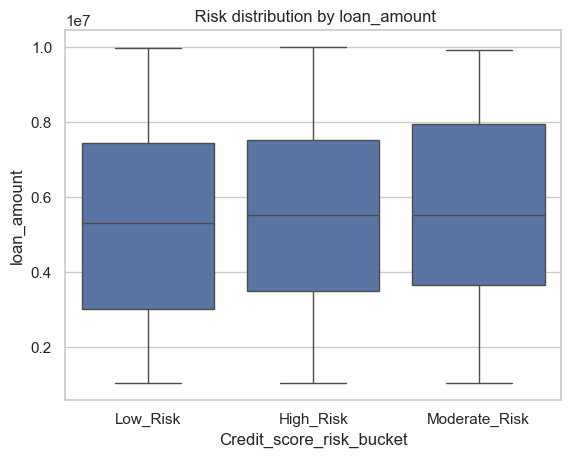

In [171]:
sns.boxplot(x='Credit_score_risk_bucket', y='loan_amount', data=df)
plt.title(' Risk distribution by loan_amount')
plt.show()

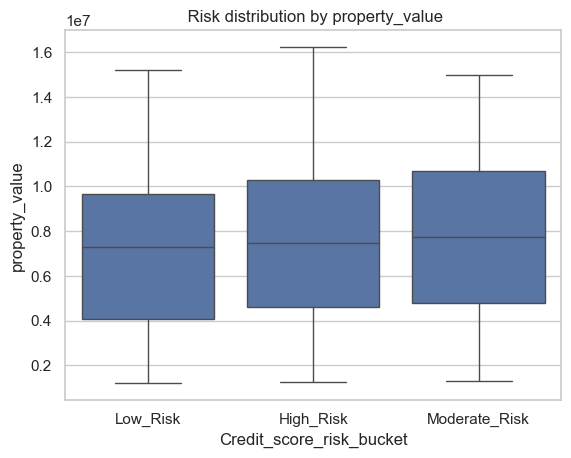

In [173]:
sns.boxplot(x='Credit_score_risk_bucket', y='property_value', data=df)
plt.title(' Risk distribution by property_value')
plt.show()

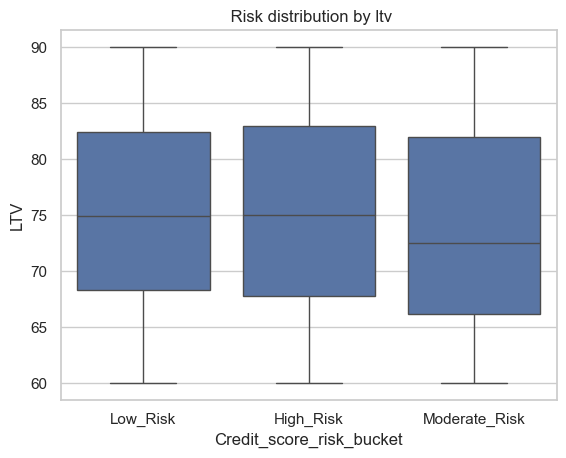

In [175]:
sns.boxplot(x='Credit_score_risk_bucket', y='LTV', data=df)
plt.title(' Risk distribution by ltv')
plt.show()

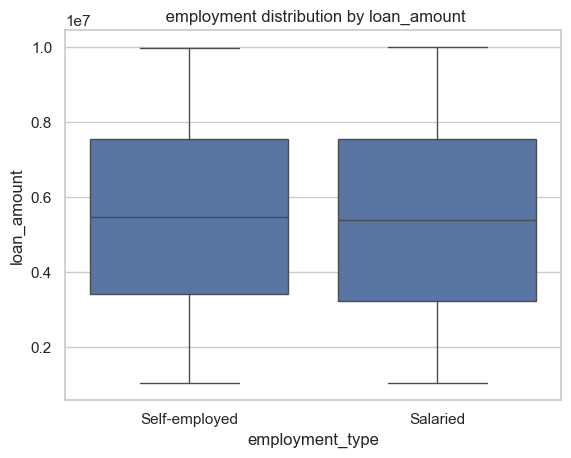

In [177]:
sns.boxplot(x='employment_type', y='loan_amount', data=df)
plt.title(' employment distribution by loan_amount')
plt.show()

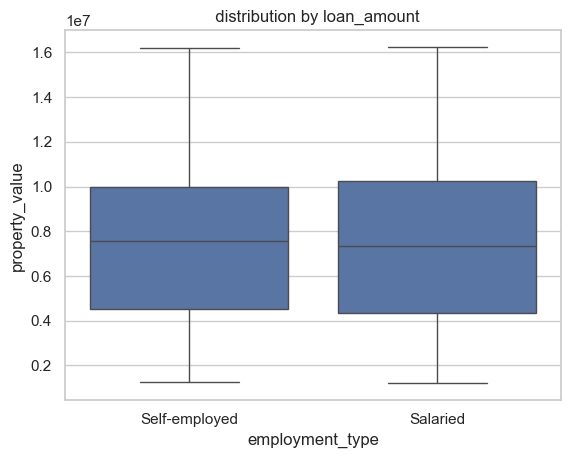

In [179]:
sns.boxplot(x='employment_type', y='property_value', data=df)
plt.title('  distribution by loan_amount')
plt.show()

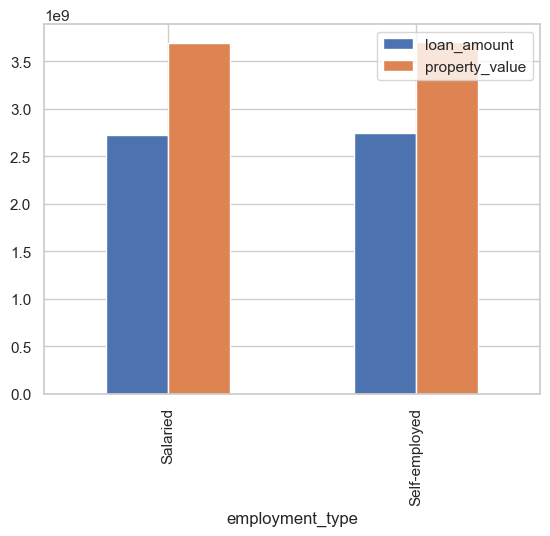

In [191]:
(df.groupby('employment_type')[['loan_amount','property_value']].agg('sum')).plot(kind='bar')
plt.show()

In [192]:
df.columns

Index(['customer_id', 'application_date', 'loan_amount', 'interest_rate',
       'tenure_years', 'credit_score', 'employment_type', 'property_value',
       'EMI', 'default_flag', 'years_before_default', 'outstanding_principal',
       'recovery_value', 'LGD', 'EAD', 'PD', 'EL', 'year', 'month', 'day',
       'LTV', 'Credit_score_risk_bucket', 'loan_size'],
      dtype='object')

## Multivariate analysis

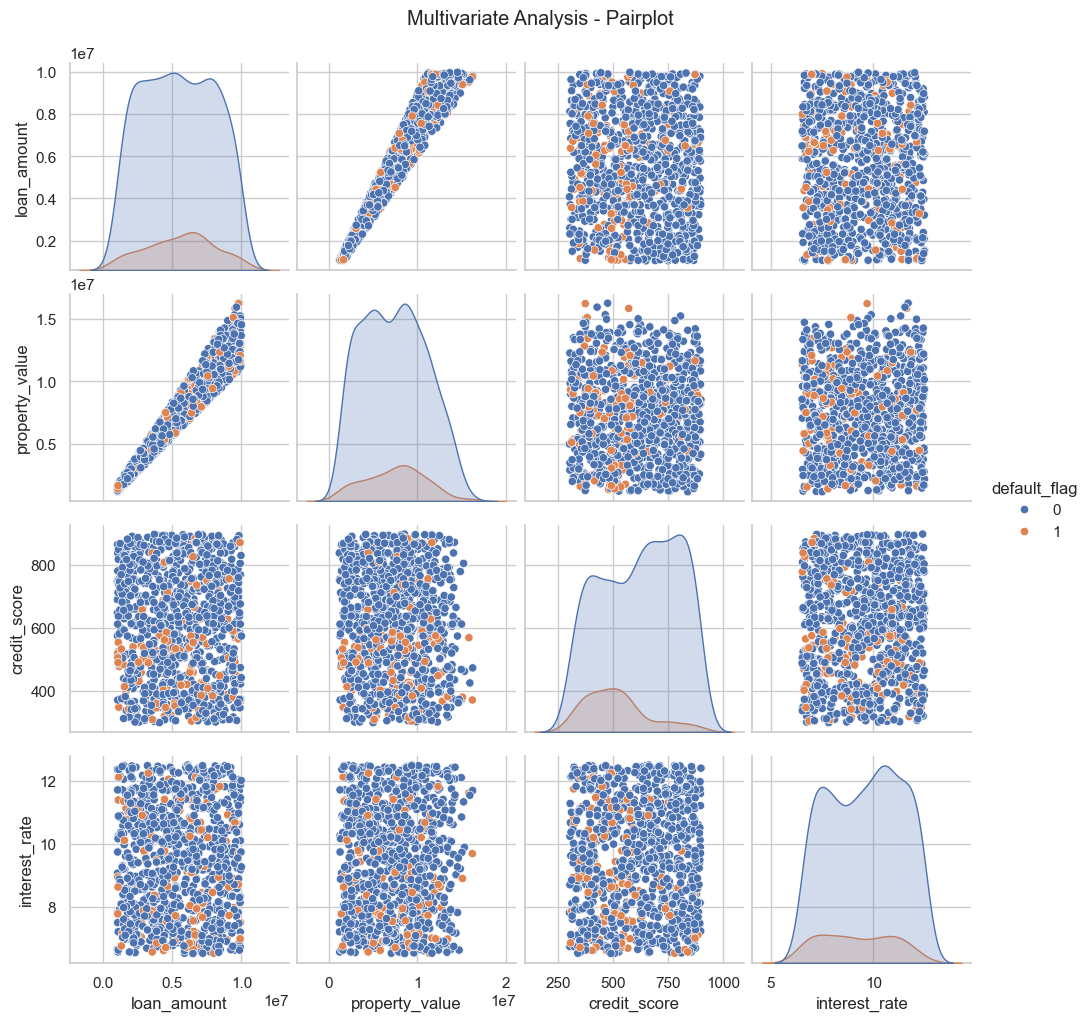

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['loan_amount', 'property_value', 'credit_score', 'interest_rate', 'default_flag']], hue='default_flag')
plt.suptitle("Multivariate Analysis - Pairplot", y=1.02)
plt.show()


## insight
Observations:
1. loan_amount, property_value, and EMI appear to have somewhat right-skewed distributions, with a few higher values.
2. credit_score seems more uniformly distributed or slightly bimodal.
3. interest_rate also appears to have a relatively normal or slightly skewed distribution.
4. tenure_years shows distinct peaks, indicating certain common loan tenures (e.g., 10, 15, 20, 25 years).

Off-Diagonal Subplots (Scatter Plots):

"""These show the scatterplot of one variable against another, revealing their relationship. The order of variables on the x and y axes is determined by their position in the matrix. For example, the plot in the second row, first column shows property_value (y-axis) vs. loan_amount (x-axis)."""

### Observations confirming the correlation matrix from the previous turn:
1. loan_amount vs. property_value: A clear, strong positive linear relationship is visible. The points cluster closely around an upward-sloping line, reinforcing the high positive correlation (0.96) seen earlier.
2. loan_amount vs. EMI: Also shows a strong positive linear relationship, confirming the high positive correlation (0.90).
property_value vs. EMI: Displays a strong positive linear relationship, consistent with the high positive correlation (0.86).
3. EMI vs. tenure_years: Shows a negative relationship. As tenure_years increases, EMI generally decreases, and the points appear to spread out more at higher tenures, confirming the moderate negative correlation (-0.32).
4. credit_score with other variables: The scatter plots involving credit_score (e.g., credit_score vs. loan_amount, credit_score vs. interest_rate) show widely dispersed points with no clear linear pattern, consistent with the very weak correlations observed in the matrix.
5. interest_rate vs. EMI: Shows a weak positive trend, but with much more scatter than the loan amount/property value/EMI relationships, consistent with the weak positive correlation (0.24).

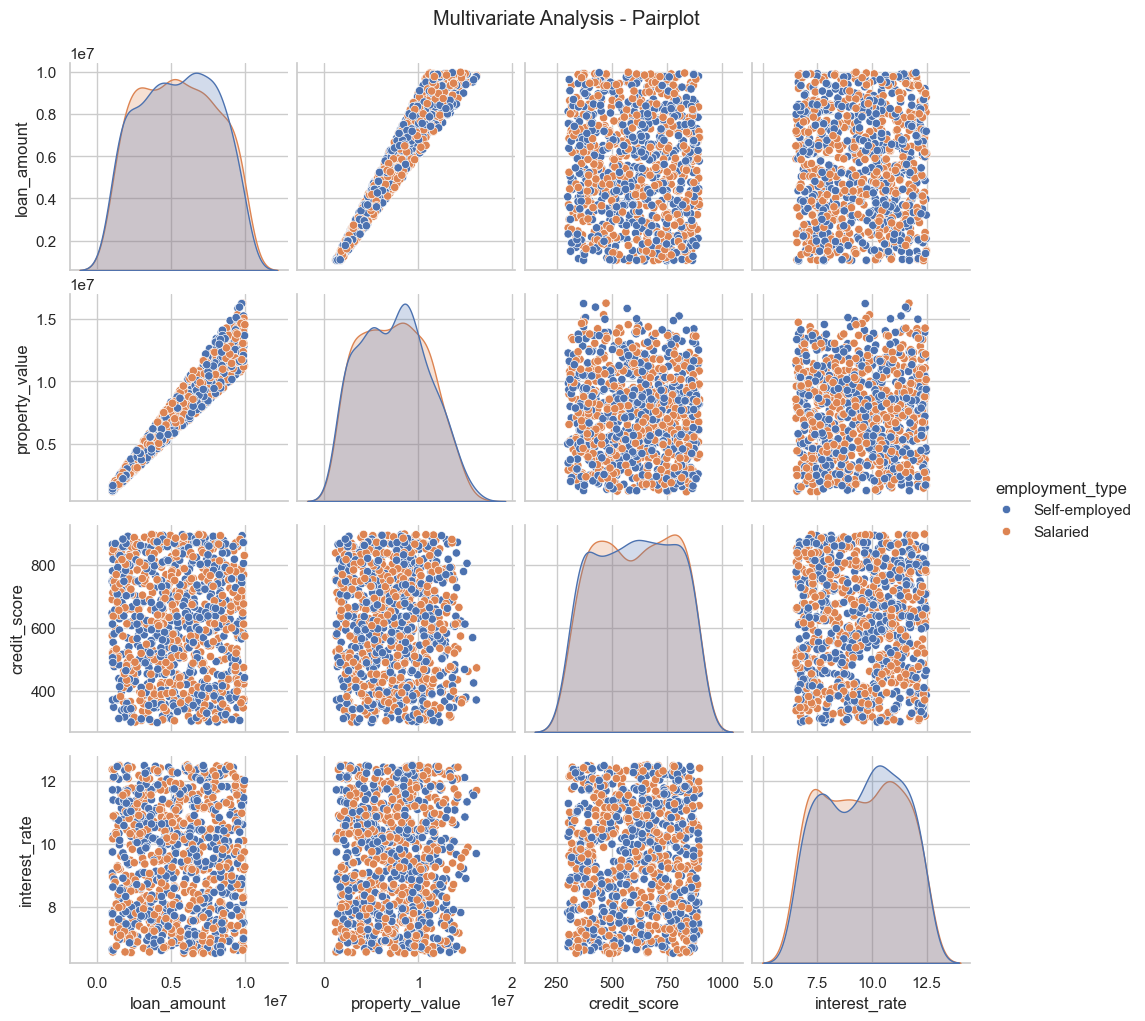

In [203]:
sns.pairplot(df[['loan_amount', 'property_value', 'credit_score', 'interest_rate', 'employment_type']], hue='employement_type')
plt.suptitle("Multivariate Analysis - Pairplot", y=1.02)
plt.show()


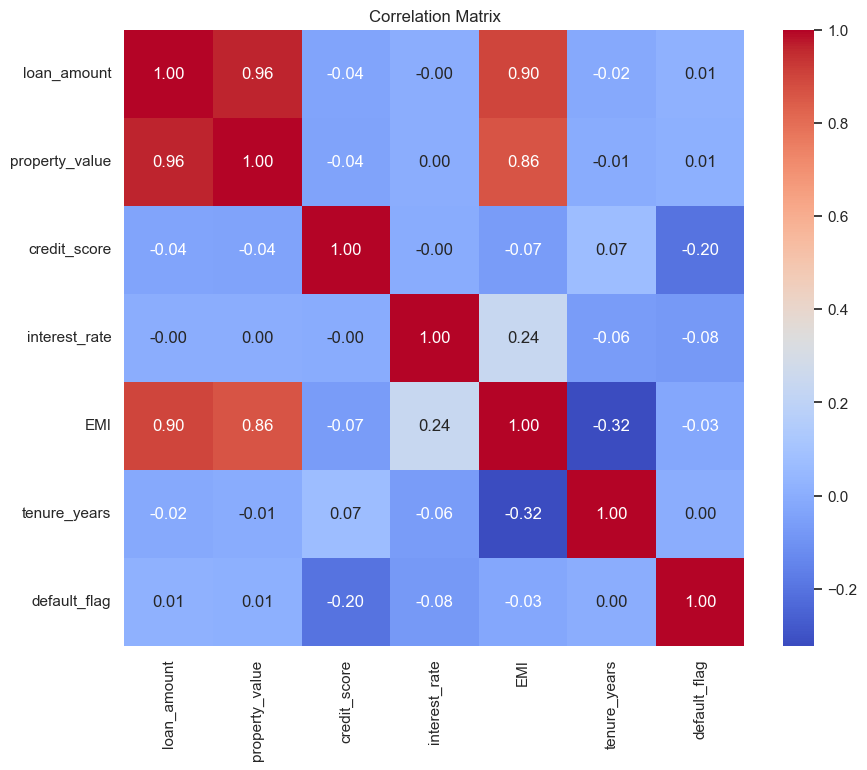

loan_amount  property_value  credit_score  interest_rate  \
loan_amount            1.00            0.96         -0.04          -0.00   
property_value         0.96            1.00         -0.04           0.00   
credit_score          -0.04           -0.04          1.00          -0.00   
interest_rate         -0.00            0.00         -0.00           1.00   
EMI                    0.90            0.86         -0.07           0.24   
tenure_years          -0.02           -0.01          0.07          -0.06   

                 EMI  tenure_years  
loan_amount     0.90         -0.02  
property_value  0.86         -0.01  
credit_score   -0.07          0.07  
interest_rate   0.24         -0.06  
EMI             1.00         -0.32  
tenure_years   -0.32          1.00

In [214]:
import numpy as np

plt.figure(figsize=(10, 8))
corr = df[['loan_amount', 'property_value', 'credit_score', 'interest_rate', 'EMI', 'tenure_years','default_flag']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

df[['loan_amount', 'property_value', 'credit_score', 'interest_rate', 'EMI', 'tenure_years']].corr()


## Insights:
Key relationships observed from the matrix (reading the table):

loan_amount and property_value:

Correlation: 0.96
States: There is a very strong positive correlation between the loan amount and the property value. This makes sense as larger loans are typically given for properties with higher values.
loan_amount and EMI:

Correlation: 0.90
States: There is a strong positive correlation between the loan amount and the EMI. Higher loan amounts generally lead to higher monthly installments.
property_value and EMI:

Correlation: 0.86
States: There is a strong positive correlation between the property value and the EMI. As property value increases, the EMI tends to increase.
EMI and tenure_years:

Correlation: -0.32
States: There is a moderate negative correlation between EMI and tenure years. This implies that as the loan tenure increases, the EMI tends to decrease (spreading the loan repayment over a longer period reduces the monthly installment).
credit_score with other variables:

credit_score vs. loan_amount: -0.04 (Very weak negative)
credit_score vs. property_value: -0.04 (Very weak negative)
credit_score vs. interest_rate: -0.00 (No linear relationship)
credit_score vs. EMI: -0.07 (Very weak negative)
credit_score vs. tenure_years: 0.07 (Very weak positive)
States: credit_score has very weak or negligible linear correlation with loan_amount, property_value, interest_rate, EMI, and tenure_years. This suggests that these variables don't strongly predict credit score, or vice-versa, in a linear fashion within this dataset.
interest_rate and EMI:

Correlation: 0.24
States: There is a weak positive correlation between interest rate and EMI. Higher interest rates contribute to higher EMIs, but other factors like loan amount and tenure play a larger role.
interest_rate and tenure_years:

Correlation: -0.06
States: There is a very weak negative correlation.

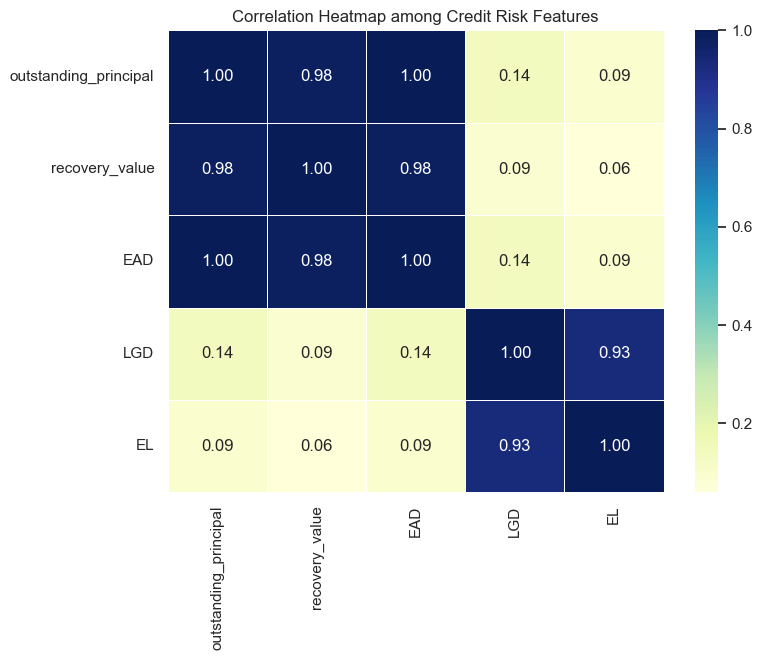

outstanding_principal  recovery_value  EAD  LGD   EL
outstanding_principal                   1.00            0.98 1.00 0.14 0.09
recovery_value                          0.98            1.00 0.98 0.09 0.06
EAD                                     1.00            0.98 1.00 0.14 0.09
LGD                                     0.14            0.09 0.14 1.00 0.93
EL                                      0.09            0.06 0.09 0.93 1.00

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key risk-related features
risk_cols = ['outstanding_principal', 'recovery_value', 'EAD', 'LGD', 'EL']

# Compute correlation matrix
corr_matrix = df[risk_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap among Credit Risk Features")
plt.show()

df[risk_cols].corr()


### Observations:
Strong Positive Relationships:
1. outstanding_principal vs. recovery_value: There's a very strong positive linear relationship. As outstanding principal increases, the recovery value also tends to increase. This is logical, as higher outstanding amounts provide more to potentially recover.
2. outstanding_principal vs. EAD: A very strong positive linear relationship is evident. Higher outstanding principal directly translates to higher exposure at default.
3. outstanding_principal vs. EL: A strong positive relationship. Higher outstanding principal generally leads to higher expected loss.
4. recovery_value vs. EAD: A strong positive relationship. Higher recovery values often correlate with higher exposures.
5. recovery_value vs. EL: A positive relationship. While recoveries reduce loss, the scatter plot shows a general upward trend, meaning that in cases where there's a higher recovery, there was likely a higher initial exposure and thus higher potential expected loss.
6. EAD vs. EL: A very strong positive linear relationship. This is expected, as Expected Loss (EL) is often calculated as Probability of Default (PD) * LGD * EAD. If PD and LGD are relatively stable, then EL will be directly proportional to EAD.
LGD (Loss Given Default) Relationships:
7. LGD vs. outstanding_principal, recovery_value, EAD, EL: The scatter plots involving LGD show a less clear linear pattern compared to the other variables. The points are more dispersed. This suggests that while there might be some correlation (which would be numerical), LGD doesn't follow as strong and straightforward a linear relationship with the other metrics as they do with each other. This is also typical, as LGD is a ratio or proportion of loss, and its drivers can be complex.

In [ ]:
## machine Learning Pipe_Line
